In [1]:
# General Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


Data Analysis, Visualization and Cleaning

In [4]:
print('The shape of the Dataset is :', df.shape, 'with', df.shape[0], 'records and', df.shape[1], 'columns')

The shape of the Dataset is : (101766, 50) with 101766 records and 50 columns


In [5]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [6]:
print('There are total', len(df.columns), 'columns in the dataset.')

There are total 50 columns in the dataset.


In [7]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983458,12522.0,84961194.0,152388987.0,230270887.5,443867222.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0


In [8]:
for i in df.columns:
    print(i, df[df[i] == '?'].shape[0])

encounter_id 0
patient_nbr 0
race 2273
gender 0
age 0
weight 98569
admission_type_id 0
discharge_disposition_id 0
admission_source_id 0
time_in_hospital 0
payer_code 40256
medical_specialty 49949
num_lab_procedures 0
num_procedures 0
num_medications 0
number_outpatient 0
number_emergency 0
number_inpatient 0
diag_1 21
diag_2 358
diag_3 1423
number_diagnoses 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [9]:
print('There are', len(df['patient_nbr'].unique()), 'unique patients in the data.')

print('There are', len(df['encounter_id'].unique()), 'unique encounters in the data.')

There are 71518 unique patients in the data.
There are 101766 unique encounters in the data.


In [10]:
len(df['encounter_id'].unique())/len(df['patient_nbr'].unique())

1.4229424760200229

In [11]:
df_encounters_check = df.groupby(['patient_nbr']).agg(encounters = ('encounter_id', 'count')).reset_index().sort_values(['encounters'], ascending = False)
df_encounters_check[df_encounters_check['encounters']==1]

,patient_nbr,encounters
71517,189502619,1
3,774,1
4,927,1
6,1305,1
8,1629,1
...,...,...
71466,187462958,1
71467,187663415,1
71468,187696427,1
71469,187750211,1


In [12]:
df['readmitted'].value_counts()

,count
readmitted,
NO,54864
>30,35545
<30,11357


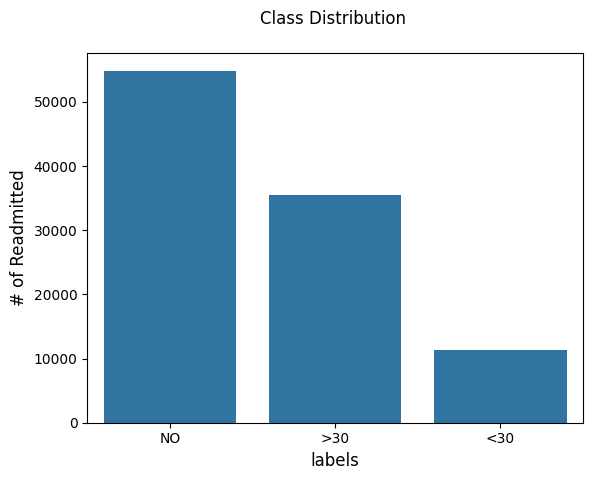

In [13]:
ax = sns.barplot(x=df['readmitted'].value_counts().index,   y=df['readmitted'].value_counts())
plt.xlabel('labels', size = 12)
plt.ylabel('# of Readmitted', size = 12)
plt.title('Class Distribution \n', size = 12)
plt.show()

In [14]:
df['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

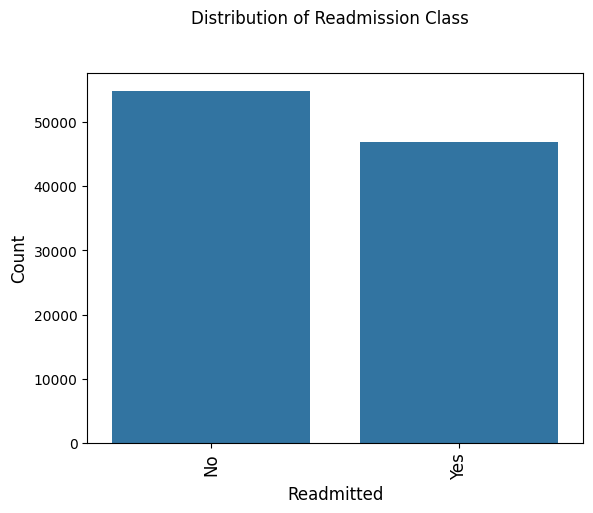

In [15]:
def check_label(text):
    if text == '>30' or text =='<30':
        return 'Yes'
    else:
        return 'No'

df['readmitted_2'] =df['readmitted'].apply(check_label)
ax = sns.countplot(x='readmitted_2',   data= df)
plt.xlabel('Readmitted', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Readmission Class  \n\n', size = 12)
plt.show()


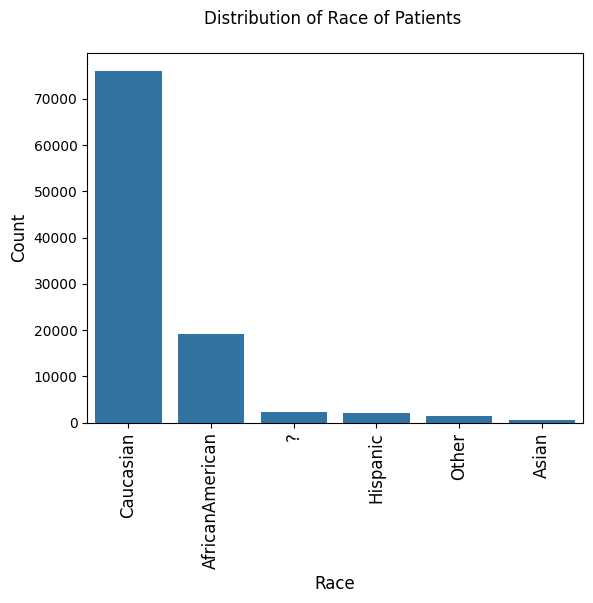

In [16]:
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

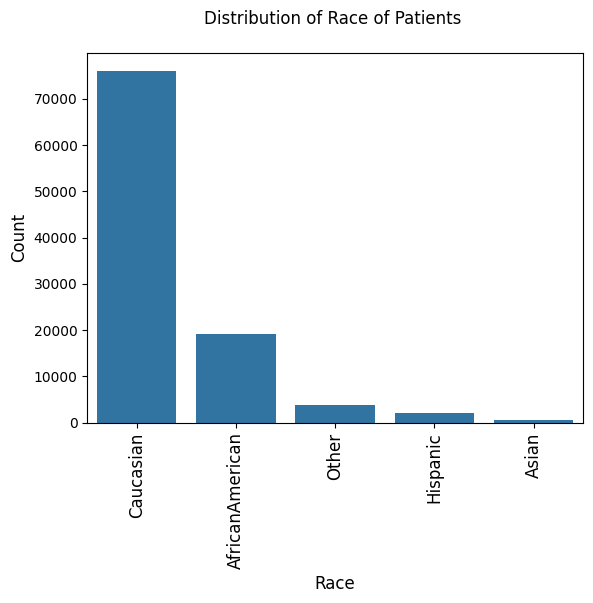

In [17]:
df.loc[df['race'] == '?', 'race'] = 'Other'
ax = sns.barplot(x=df['race'].value_counts().index,   y=df['race'].value_counts())
plt.xlabel('Race', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Distribution of Race of Patients \n', size = 12)
plt.show()

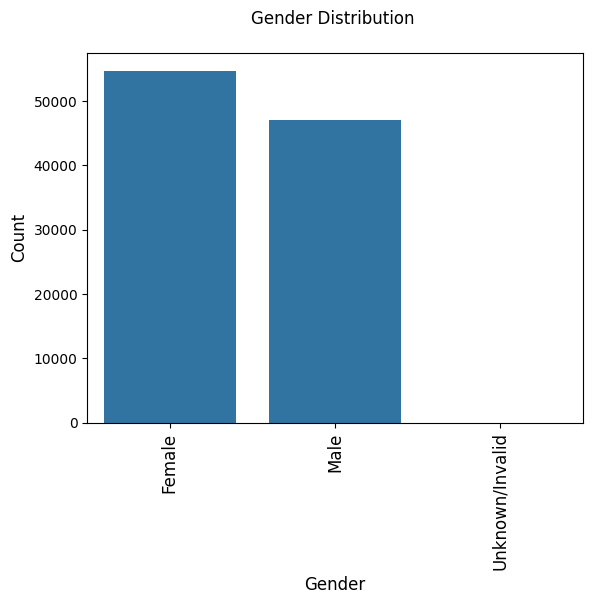

In [18]:
ax = sns.countplot(x='gender',   data= df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender Distribution \n', size = 12)
plt.show()

In [19]:
df['gender'].value_counts()

,count
gender,
Female,54708
Male,47055
Unknown/Invalid,3


In [20]:
df[df['gender']!='Unknown/Invalid']

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_2
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,No
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,No
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,No
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,Down,No,No,No,No,No,Ch,Yes,>30,Yes
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,Steady,No,No,No,No,No,No,Yes,NO,No
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,Down,No,No,No,No,No,Ch,Yes,NO,No
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,Up,No,No,No,No,No,Ch,Yes,NO,No


In [21]:
df.drop(df[df['gender'] == 'Unknown/Invalid'].index, inplace = True)
df.reset_index(inplace = True, drop = True)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_2
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,No
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,Yes
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,No
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,No
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,No


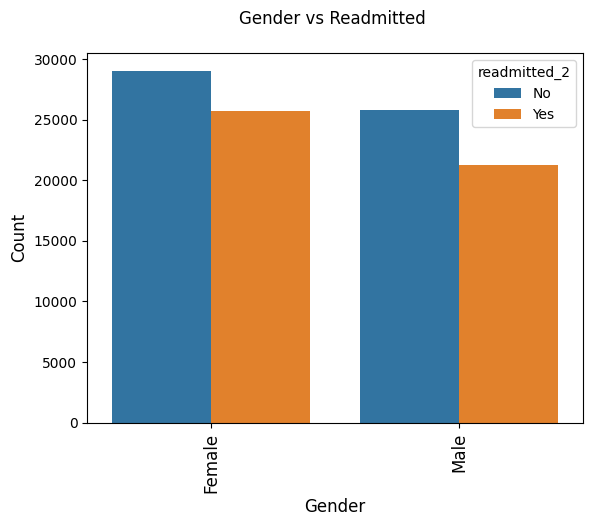

In [22]:
ax = sns.countplot(x="gender", hue="readmitted_2", data=df)
plt.xlabel('Gender', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Gender vs Readmitted \n', size = 12)
plt.show()

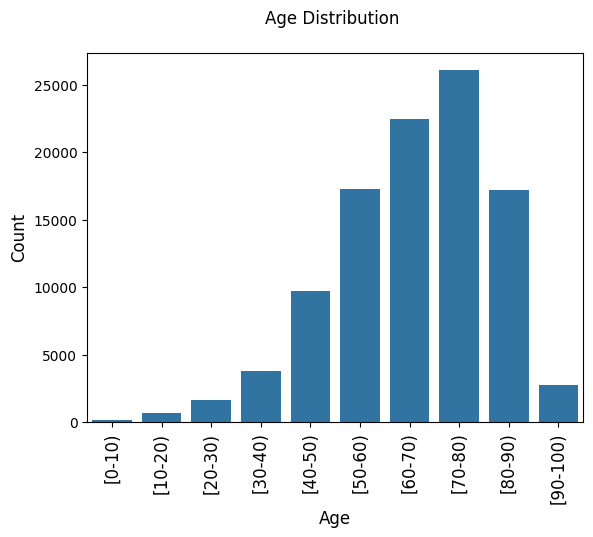

In [23]:
ax = sns.countplot(x='age',   data= df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age Distribution \n', size = 12)
plt.show()

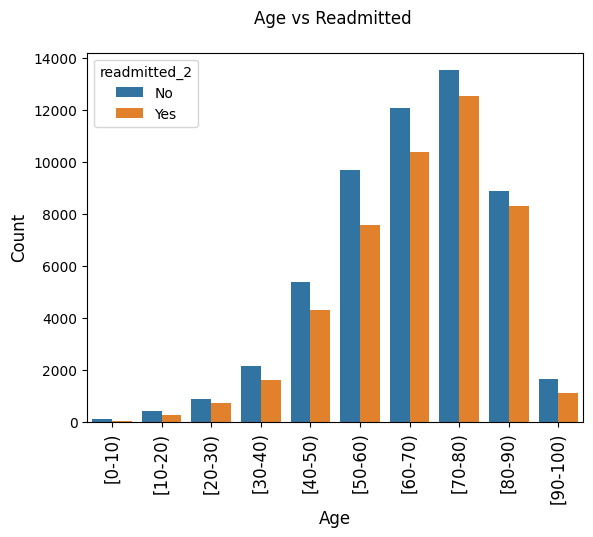

In [24]:
ax = sns.countplot(x="age", hue="readmitted_2", data=df)
plt.xlabel('Age', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Age vs Readmitted \n', size = 12)
plt.show()


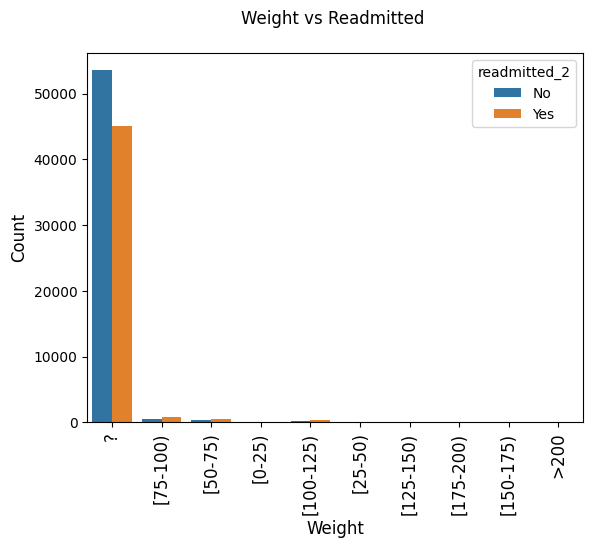

In [25]:
ax = sns.countplot(x="weight", hue="readmitted_2", data=df)
plt.xlabel('Weight', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Weight vs Readmitted \n', size = 12)
plt.show()

In [26]:
df.drop(columns = ['weight'], inplace = True)

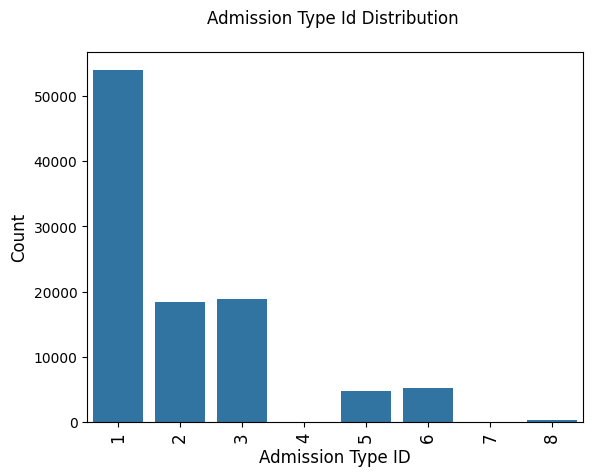

In [27]:
ax = sns.countplot(x='admission_type_id',   data= df)
plt.xlabel('Admission Type ID', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Admission Type Id Distribution \n', size = 12)
plt.show()

In [28]:
len(df['discharge_disposition_id'].unique())

26

In [29]:
df['admission_source_id'].unique()

print('There are', len(df['admission_source_id'].unique()), 'unique Admission Sources from which patient can be admitted.')

There are 17 unique Admission Sources from which patient can be admitted.


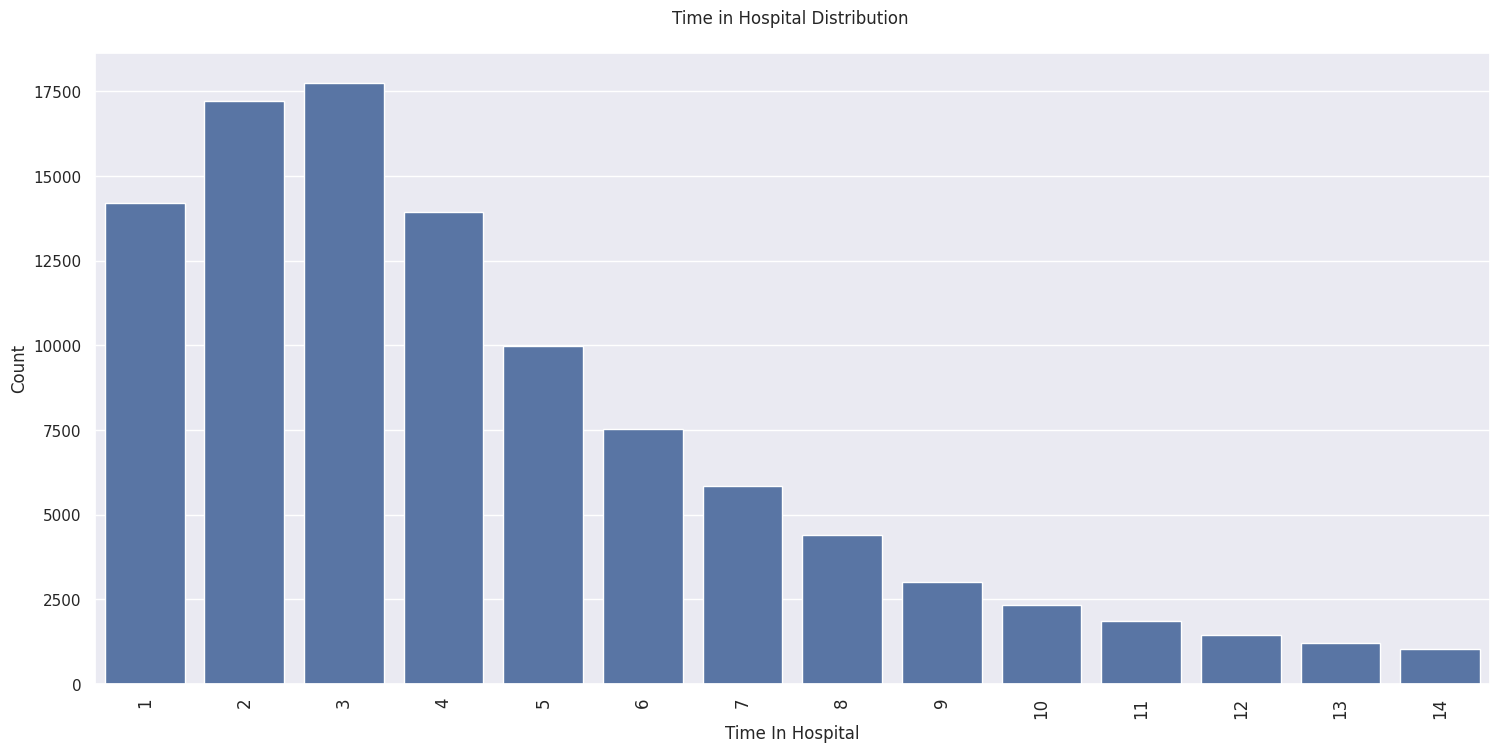

In [30]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',   data= df)
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Time in Hospital Distribution \n', size = 12)
plt.show()

In [31]:
df['time_in_hospital'].mean()

np.float64(4.396018199149003)

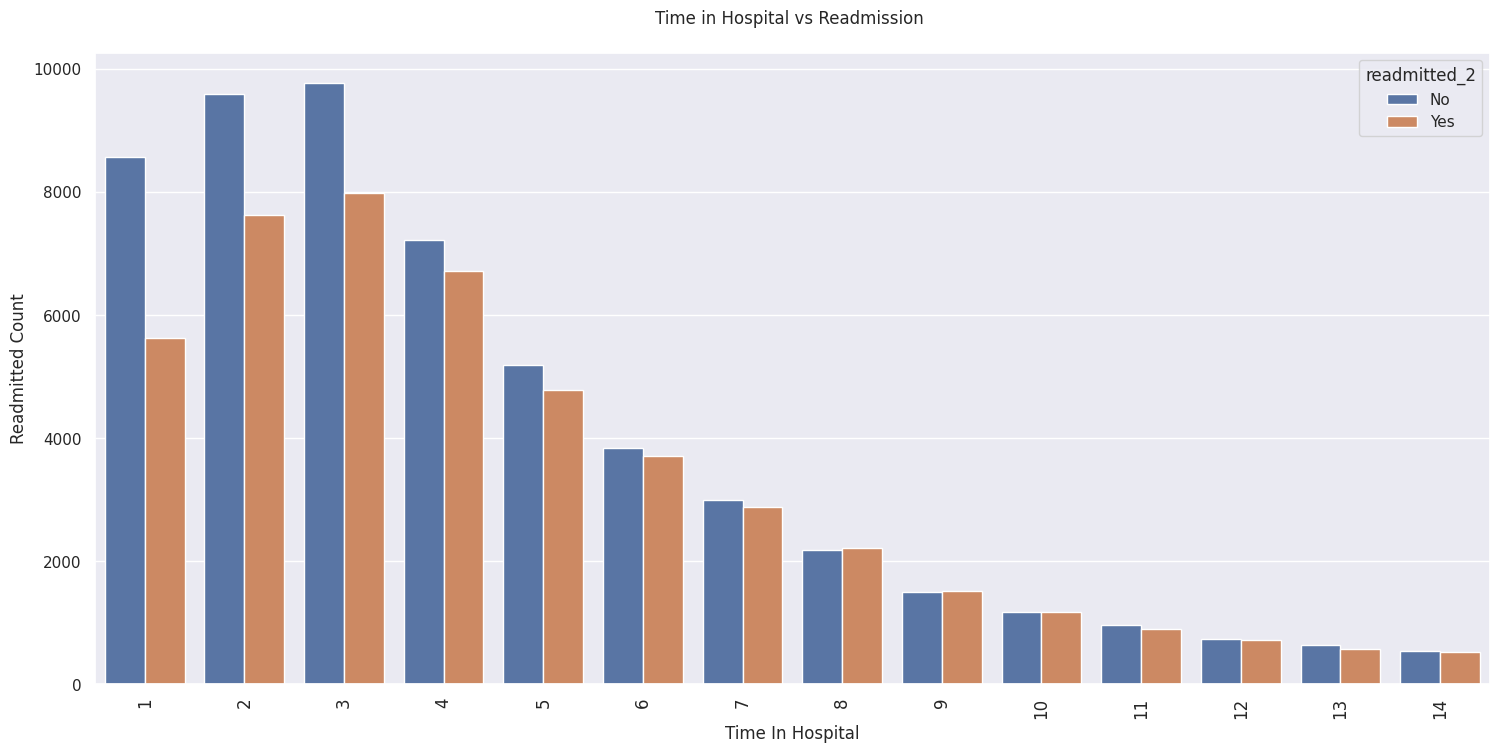

In [32]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='time_in_hospital',  hue= 'readmitted_2',  data= df)
plt.xlabel('Time In Hospital', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Time in Hospital vs Readmission \n', size = 12)
plt.show()

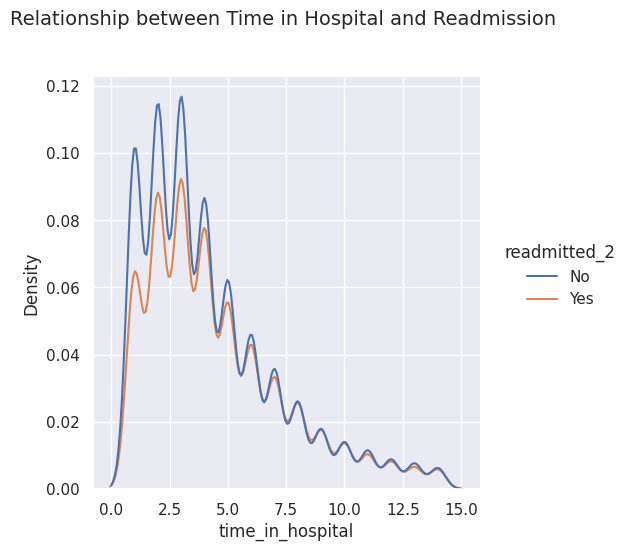

In [33]:
sns.set(rc={'figure.figsize':(18, 8.2)})
sns.displot(df, x="time_in_hospital", hue = 'readmitted_2', kind="kde")
plt.title('Relationship between Time in Hospital and Readmission \n\n', size  = 14)
plt.show()

In [34]:
df['payer_code'].value_counts()

,count
payer_code,
?,40255
MC,32439
HM,6274
SP,5007
BC,4655
MD,3532
CP,2531
UN,2448
CM,1937


In [35]:
df.drop(columns = ['payer_code'], inplace = True)

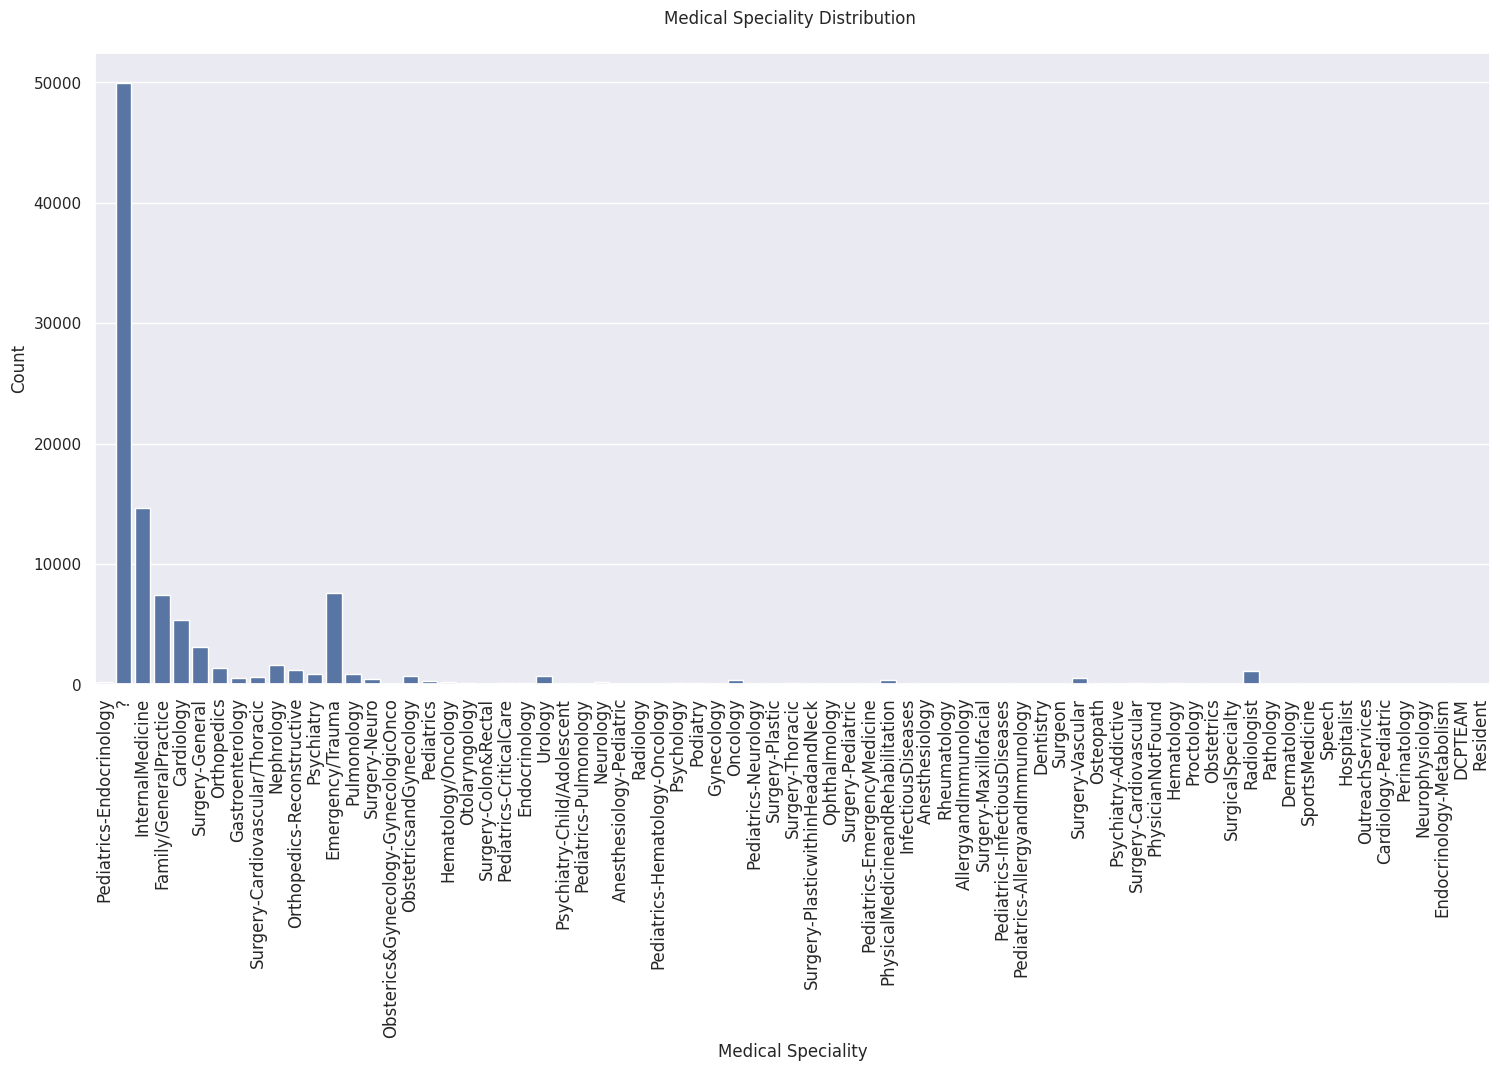

In [36]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='medical_specialty',   data= df)
plt.xlabel('Medical Speciality', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Count', size = 12)
plt.title('Medical Speciality Distribution \n', size = 12)
plt.show()

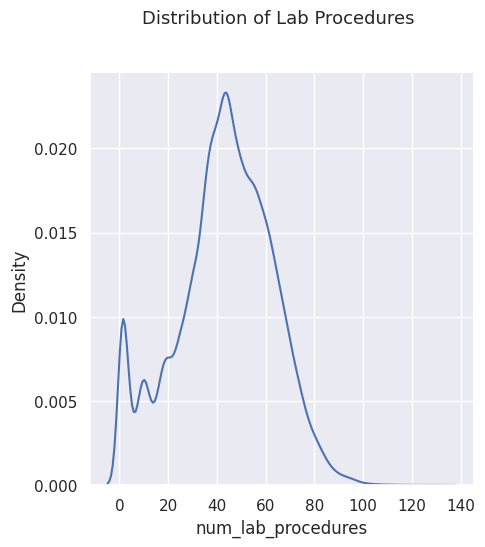

In [37]:
df.drop(columns =['medical_specialty'], inplace = True)


sns.displot(df, x="num_lab_procedures", kind="kde")
plt.title('Distribution of Lab Procedures \n\n', size = 13)
plt.show()

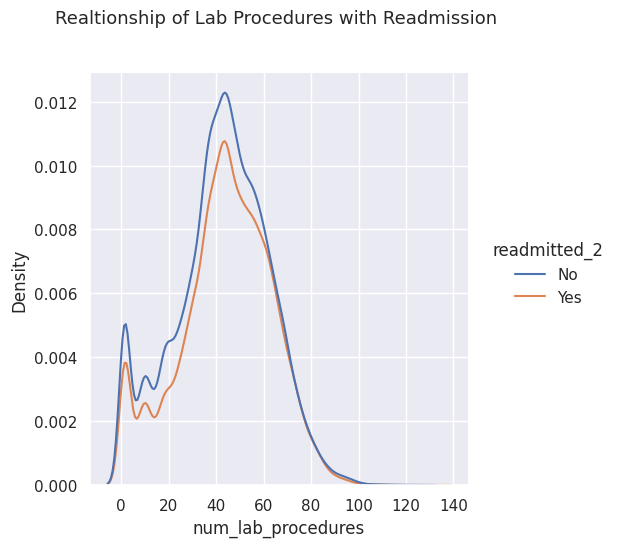

In [38]:
sns.displot(df, x="num_lab_procedures", hue= 'readmitted_2', kind="kde")
plt.title('Realtionship of Lab Procedures with Readmission \n\n', size = 13)
plt.show()

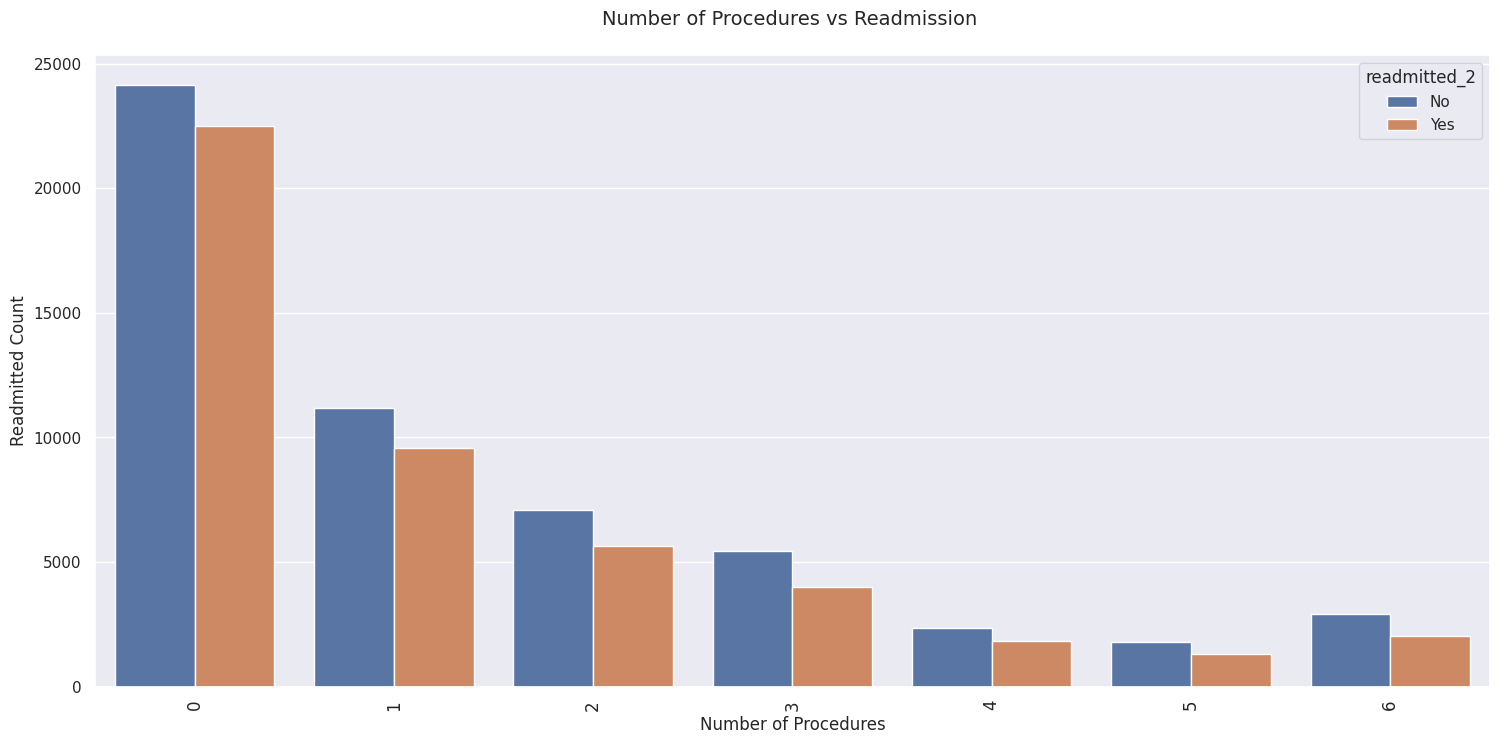

In [39]:
sns.set(rc={'figure.figsize':(18,8.2)})
ax = sns.countplot(x='num_procedures',  hue= 'readmitted_2',  data= df)
plt.xlabel('Number of Procedures', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Number of Procedures vs Readmission \n', size = 14)
plt.show()

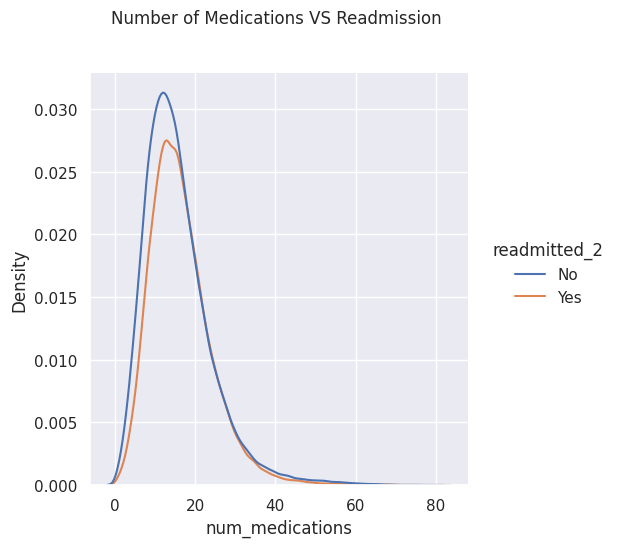

In [40]:
sns.displot(df, x="num_medications", hue= 'readmitted_2', kind="kde")
plt.title('Number of Medications VS Readmission \n\n')
plt.show()

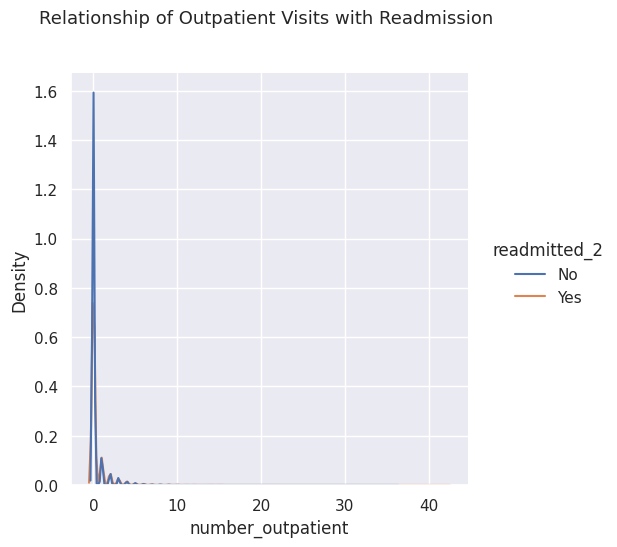

In [41]:
sns.displot(df, x="number_outpatient", hue= 'readmitted_2', kind ='kde')
plt.title('Relationship of Outpatient Visits with Readmission \n\n', size = 13)
plt.show()


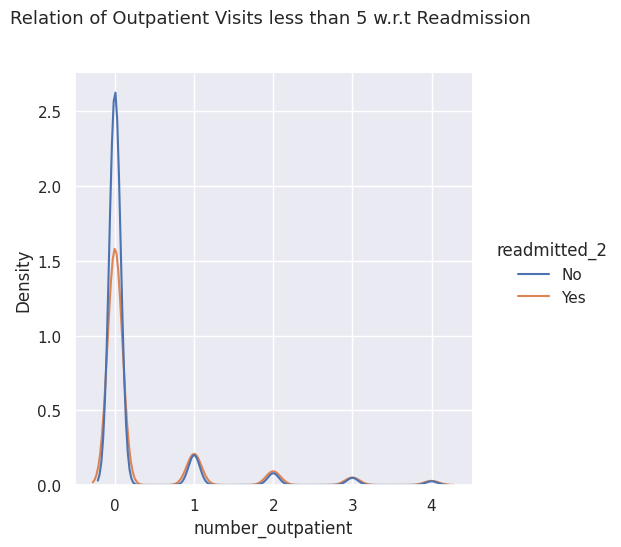

In [42]:
sns.displot(df.loc[df['number_outpatient']<5], x="number_outpatient", hue= 'readmitted_2', kind ='kde')
plt.title('Relation of Outpatient Visits less than 5 w.r.t Readmission \n\n', size = 13)
plt.show()

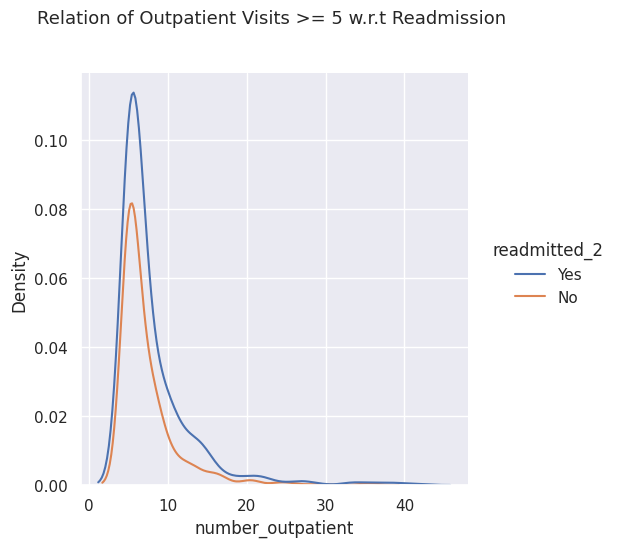

In [43]:
sns.displot(df.loc[df['number_outpatient']>=5], x="number_outpatient", hue= 'readmitted_2', kind ='kde')
plt.title('Relation of Outpatient Visits >= 5 w.r.t Readmission \n\n', size = 13)
plt.show()

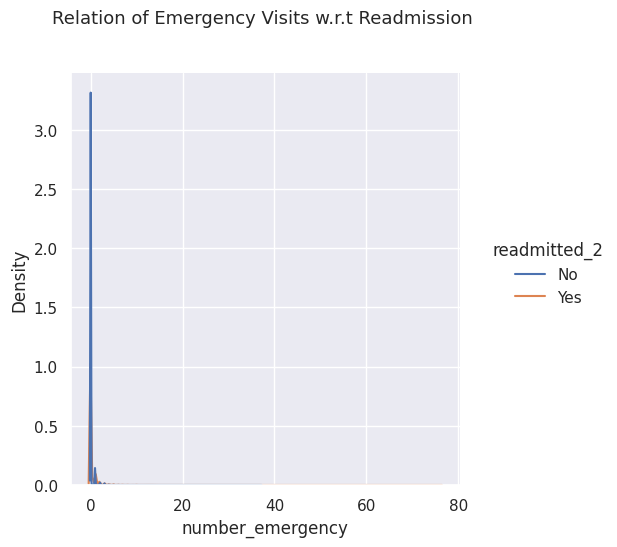

In [44]:
sns.displot(df, x="number_emergency", hue= 'readmitted_2', kind='kde')
plt.title('Relation of Emergency Visits w.r.t Readmission \n\n', size = 13)
plt.show()

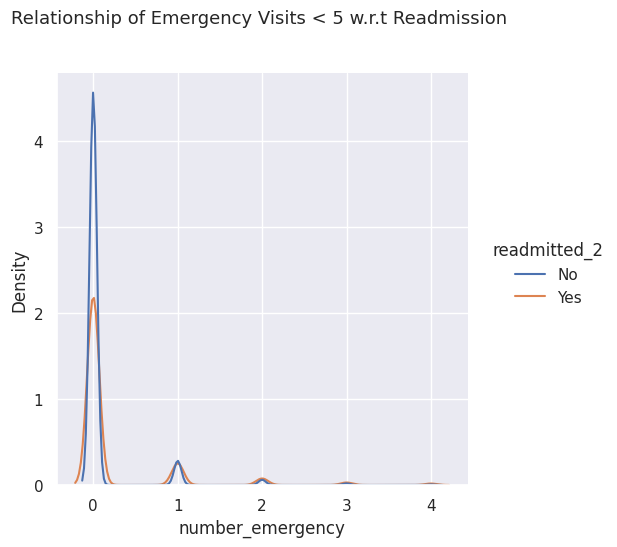

In [45]:
sns.displot(df.loc[df['number_emergency']<5], x="number_emergency", hue= 'readmitted_2', kind='kde')
plt.title('Relationship of Emergency Visits < 5 w.r.t Readmission \n\n', size = 13)
plt.show()

In [46]:
len(df['diag_1'].unique()), len(df['diag_2'].unique()), len(df['diag_3'].unique())

df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts()

,count
diag_1,
428,4057
414,2720
786,1709
486,1683
410,1438
...,...
975,1
391,1
914,1


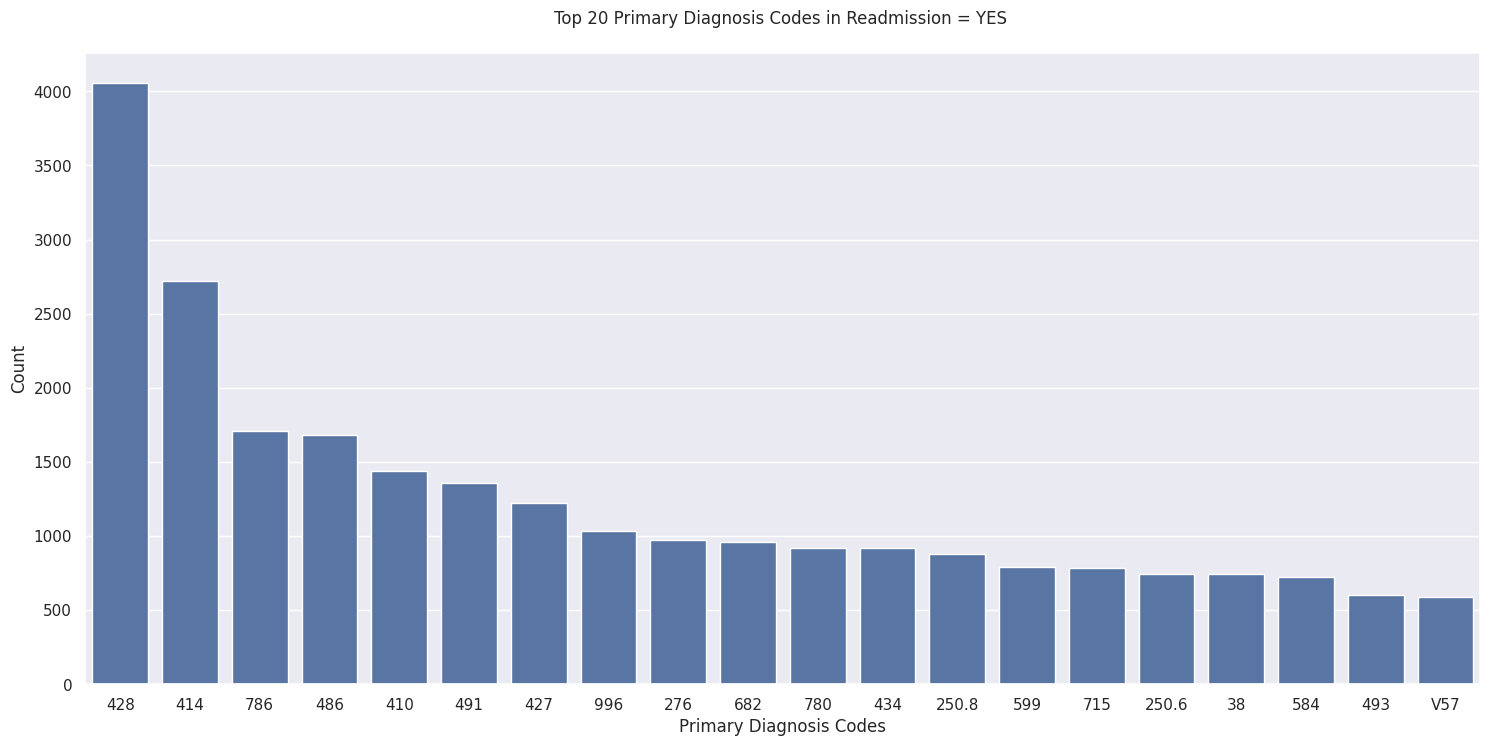

In [47]:
ax = sns.barplot(x=df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts().index[:20],
                 y=df[df['readmitted_2'] == 'Yes']['diag_1'].value_counts()[:20])
plt.xlabel('Primary Diagnosis Codes', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Top 20 Primary Diagnosis Codes in Readmission = YES \n', size = 12)
plt.show()

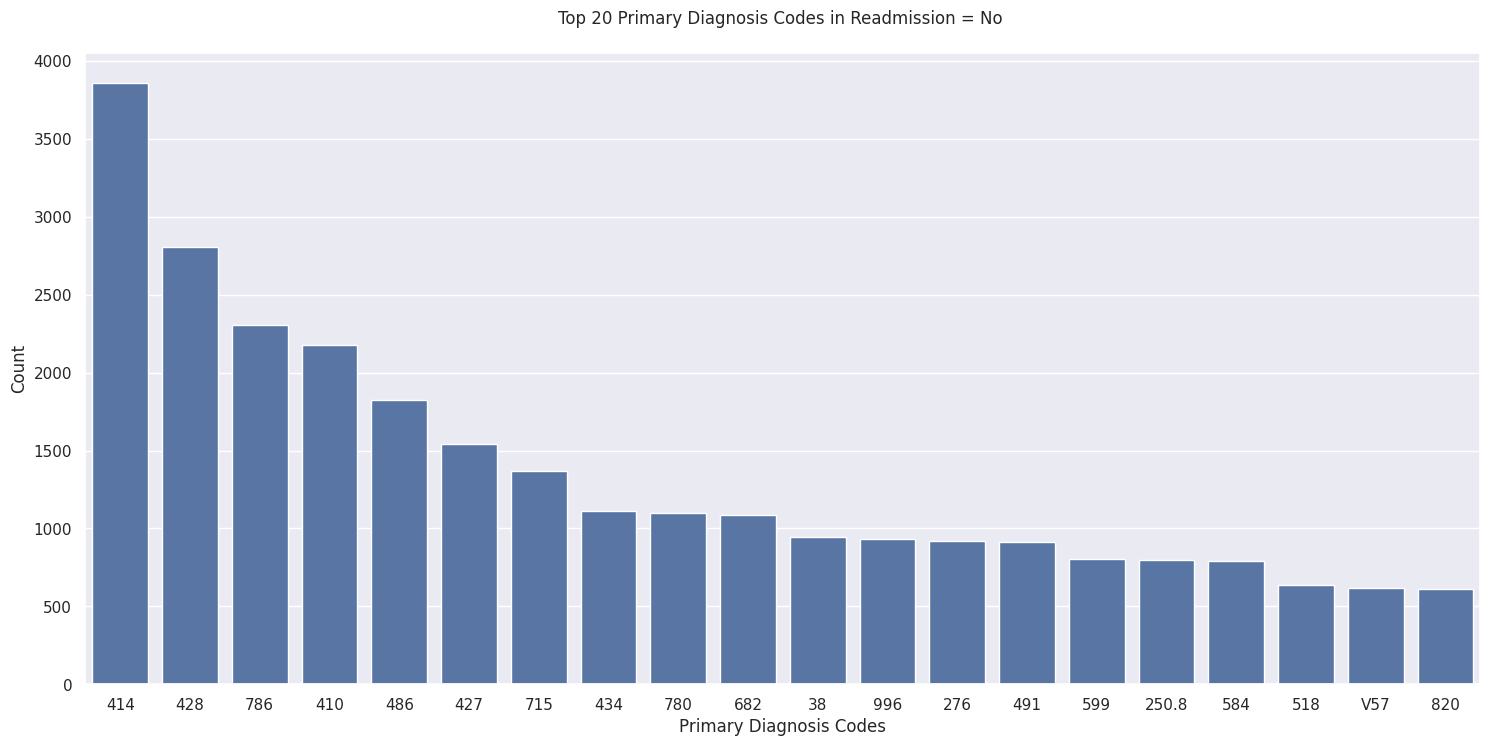

In [48]:
ax = sns.barplot(x=df[df['readmitted_2'] == 'No']['diag_1'].value_counts().index[:20],
                 y=df[df['readmitted_2'] == 'No']['diag_1'].value_counts()[:20])
plt.xlabel('Primary Diagnosis Codes', size = 12)
plt.ylabel('Count', size = 12)
plt.title('Top 20 Primary Diagnosis Codes in Readmission = No \n', size = 12)
plt.show()

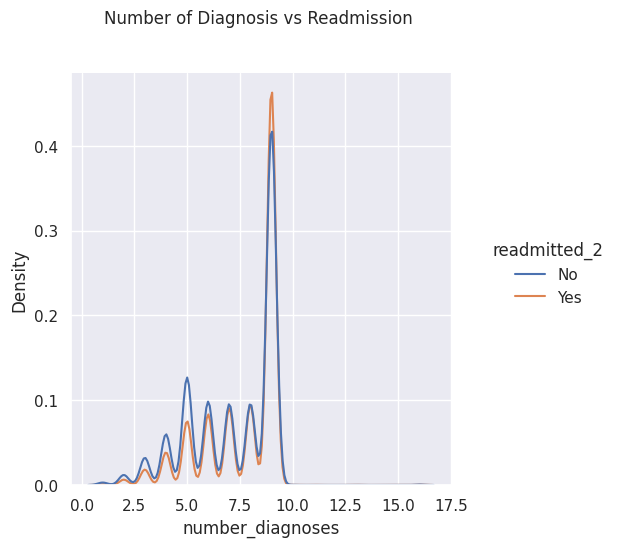

In [49]:
sns.displot(df, x="number_diagnoses", hue= 'readmitted_2', kind='kde')
plt.title('Number of Diagnosis vs Readmission \n\n')
plt.show()

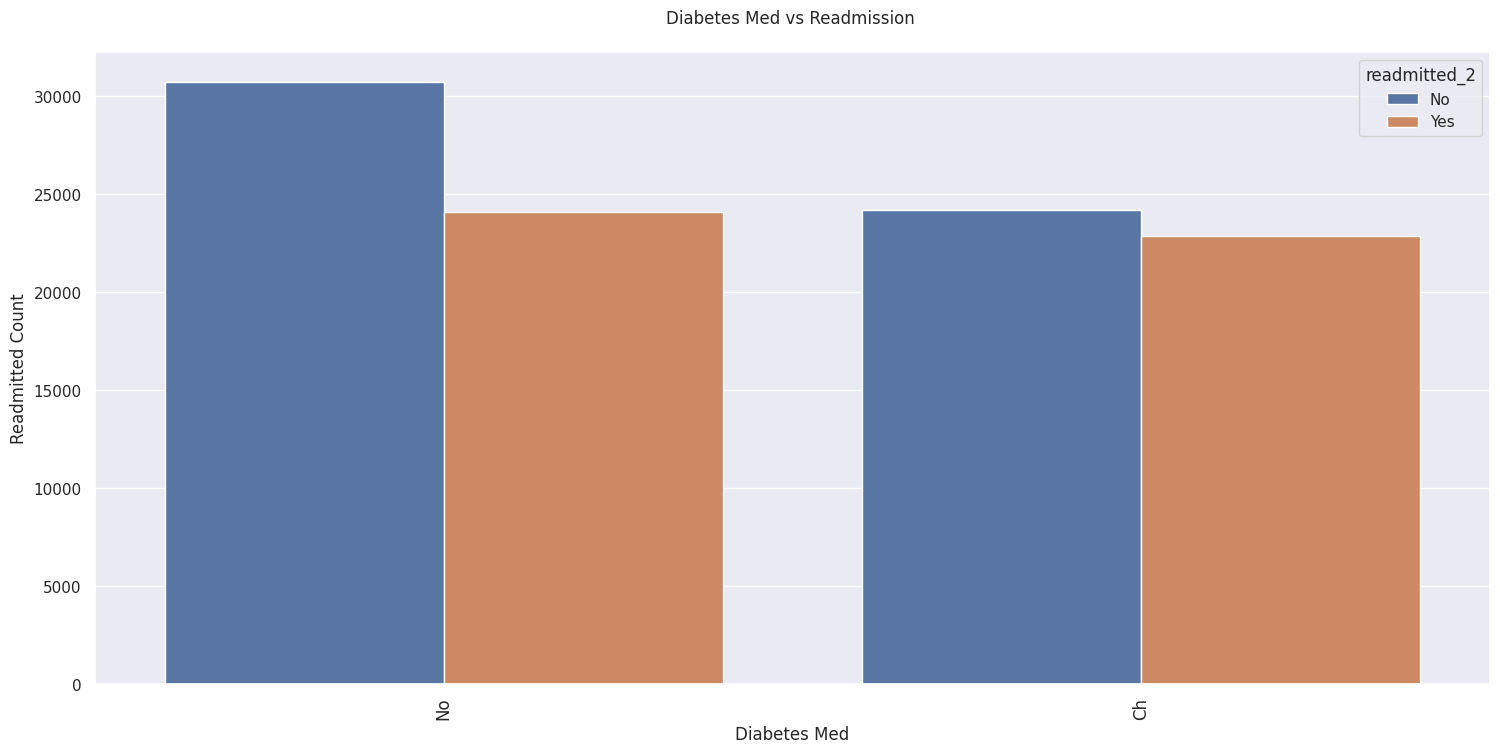

In [50]:
df['change'].value_counts()

ax = sns.countplot(x='change',  hue= 'readmitted_2',  data= df)
plt.xlabel('Diabetes Med', size = 12)
plt.xticks(rotation=90, size = 12)
plt.ylabel('Readmitted Count', size = 12)
plt.title('Diabetes Med vs Readmission \n', size = 12)
plt.show()

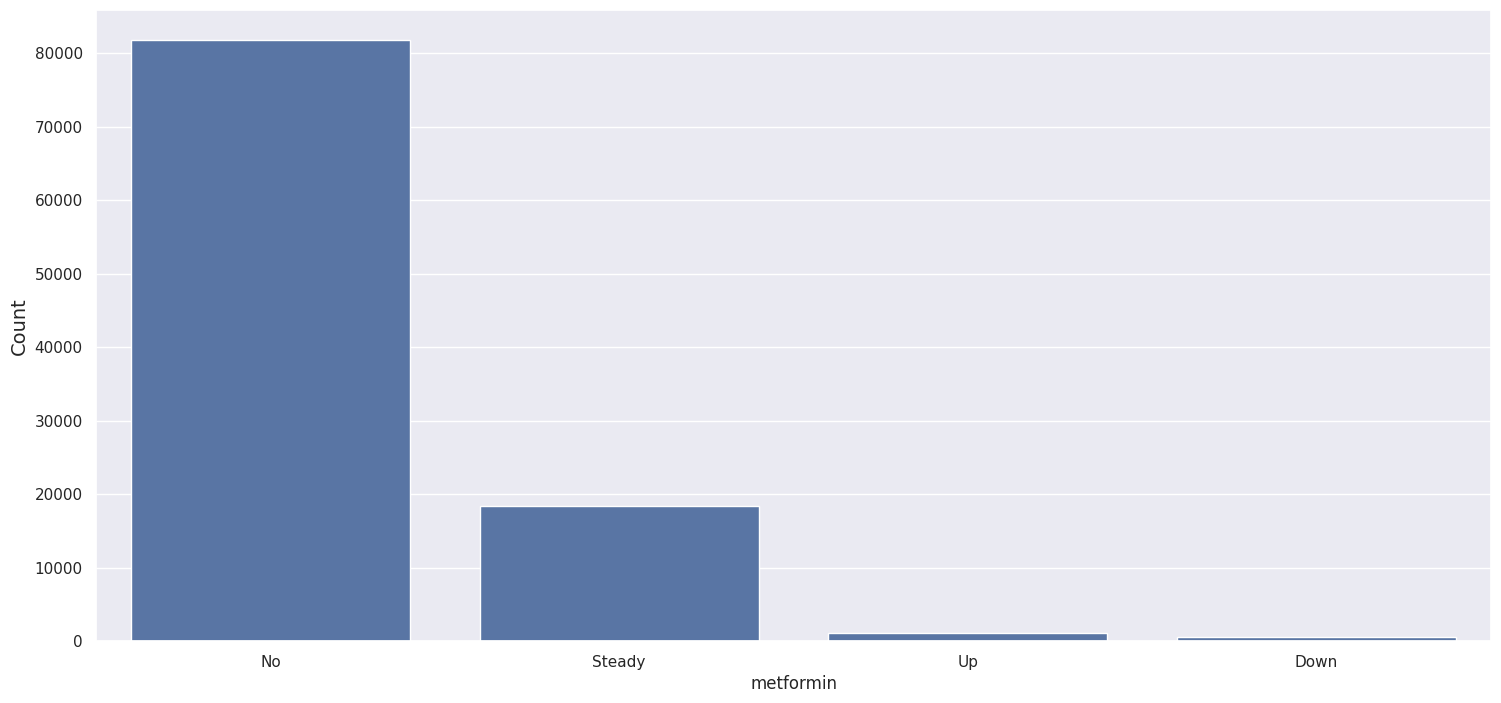

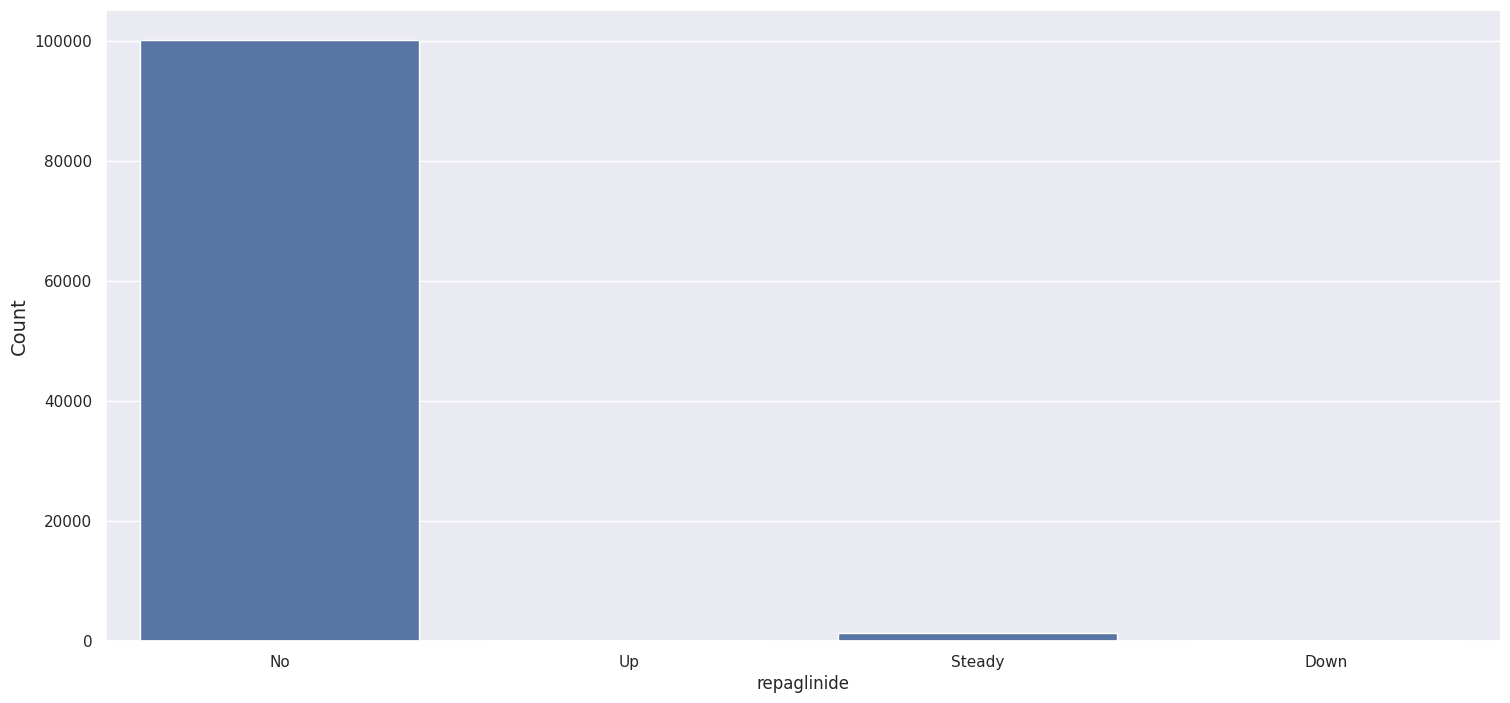

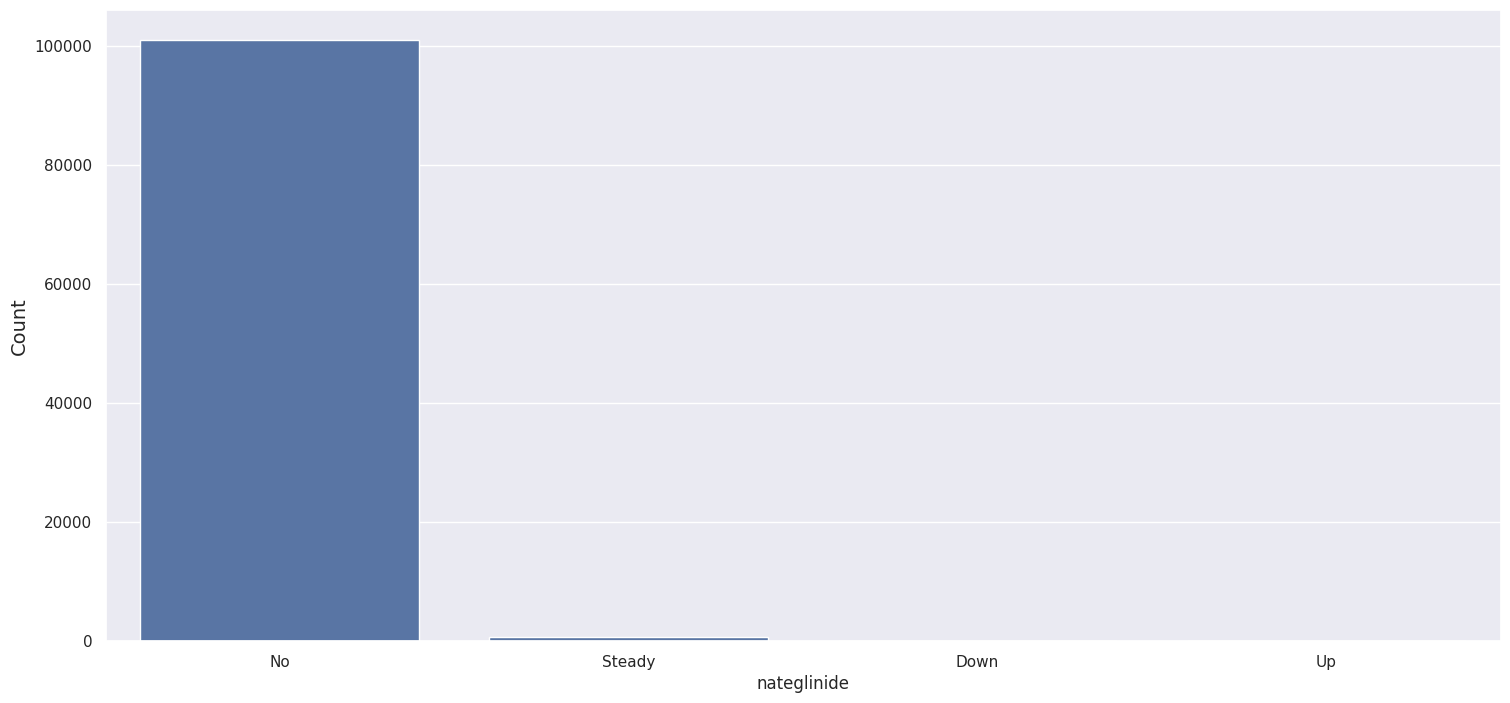

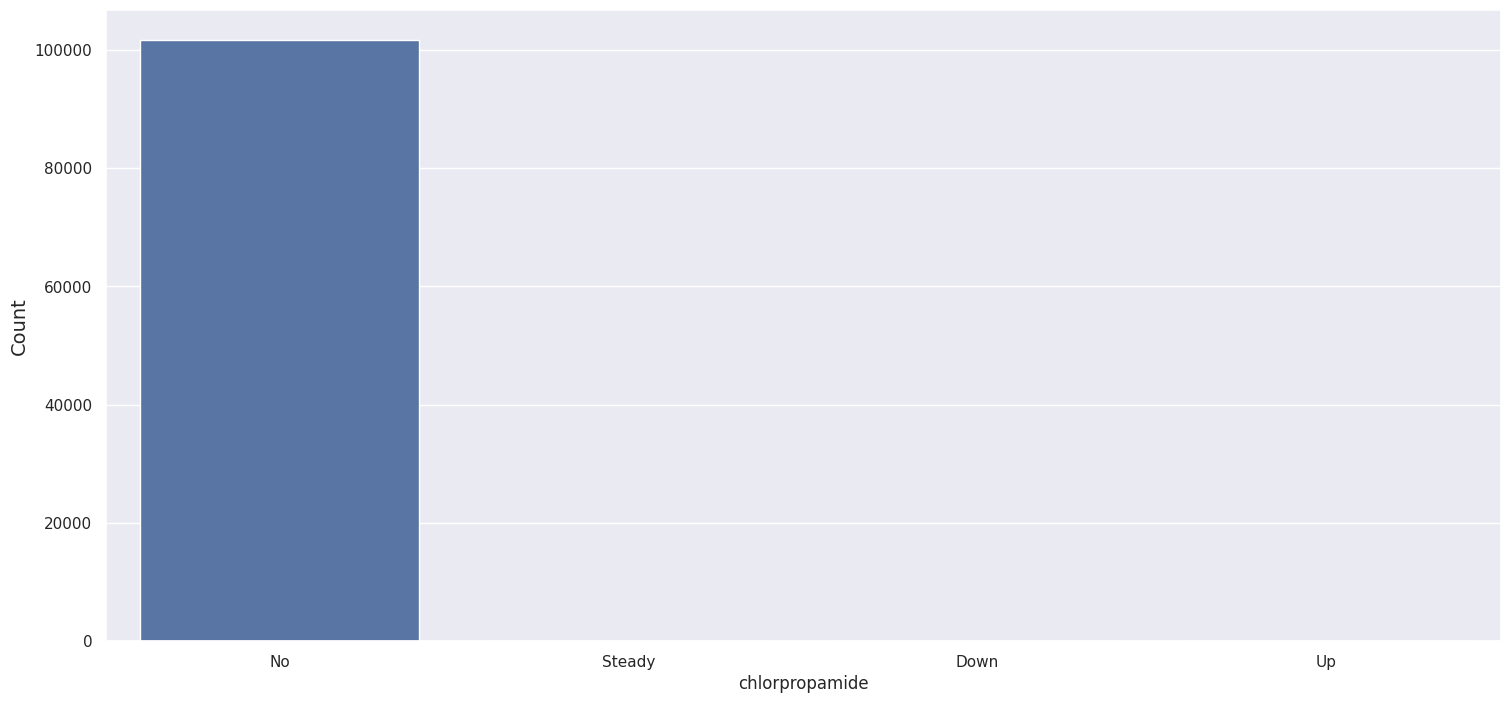

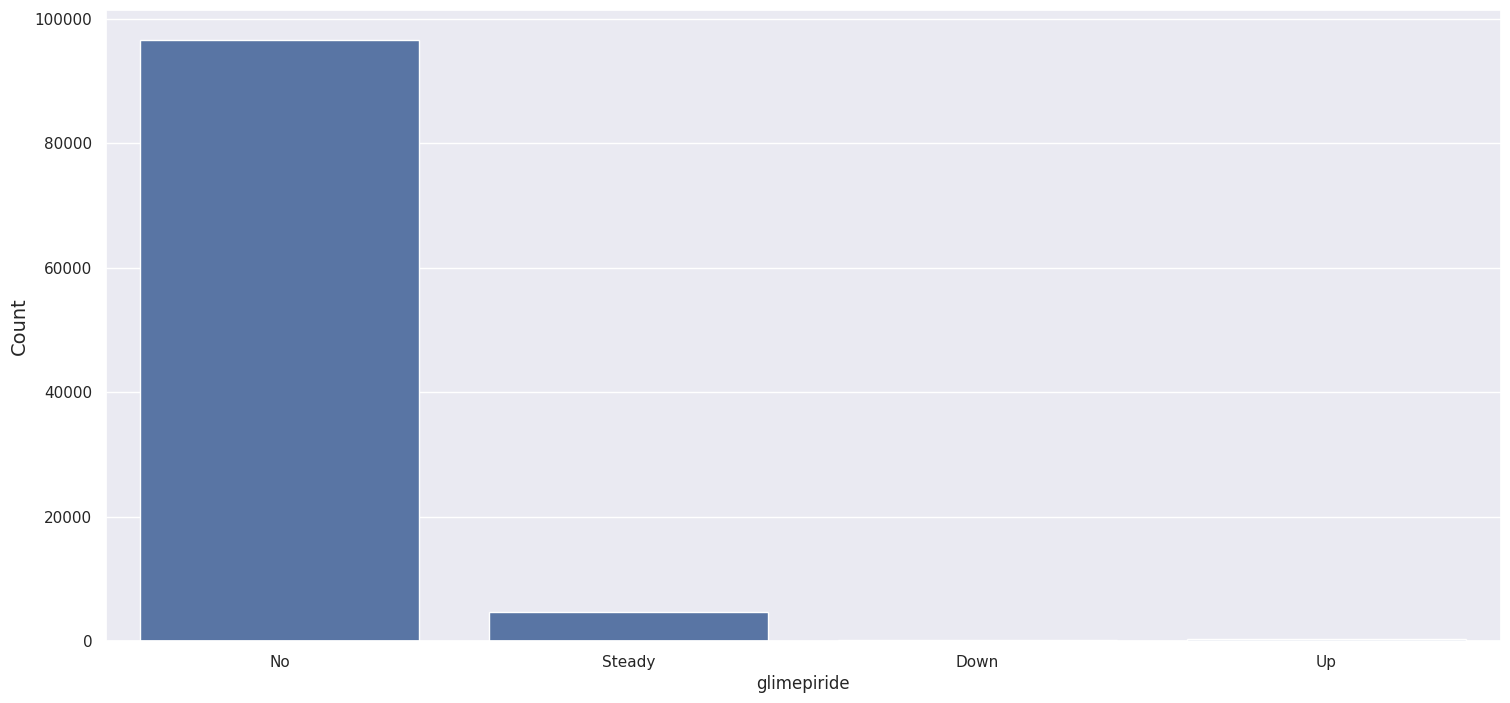

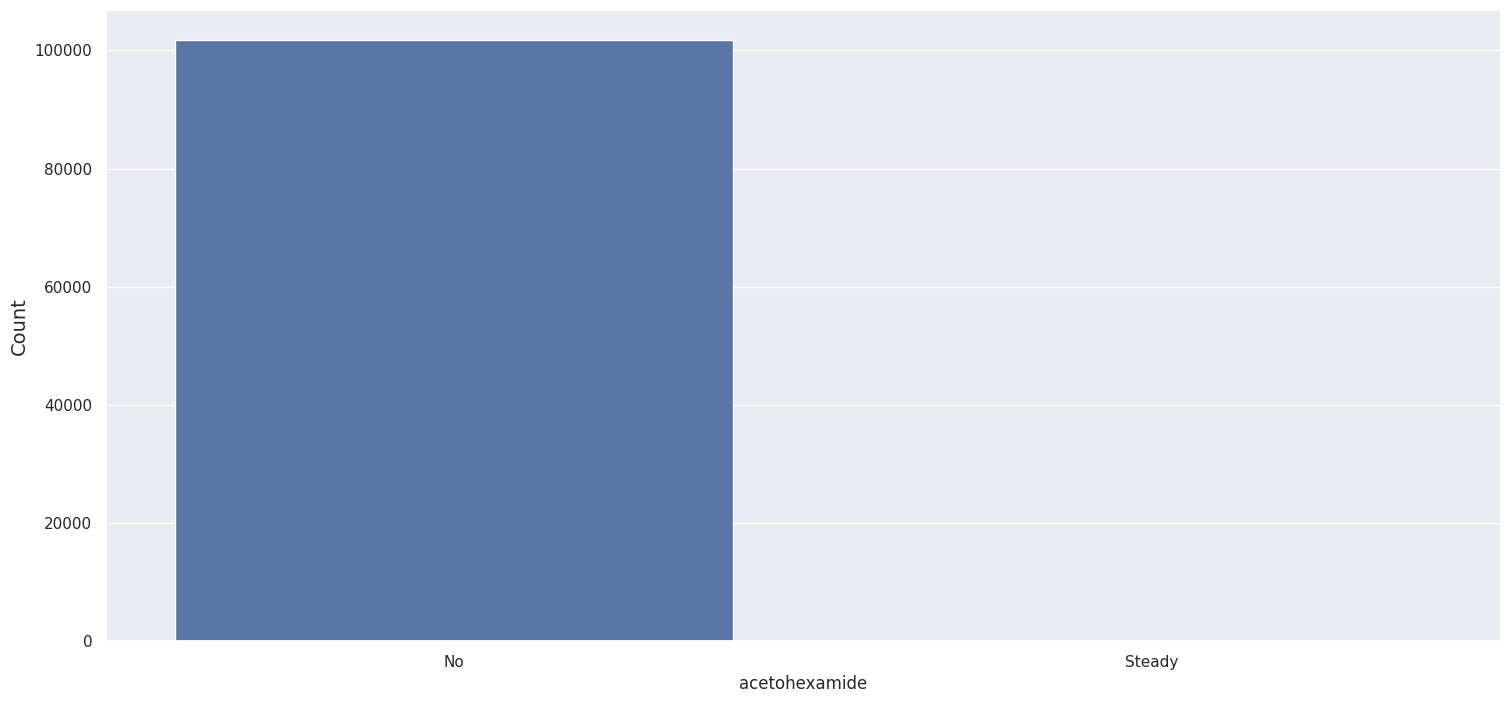

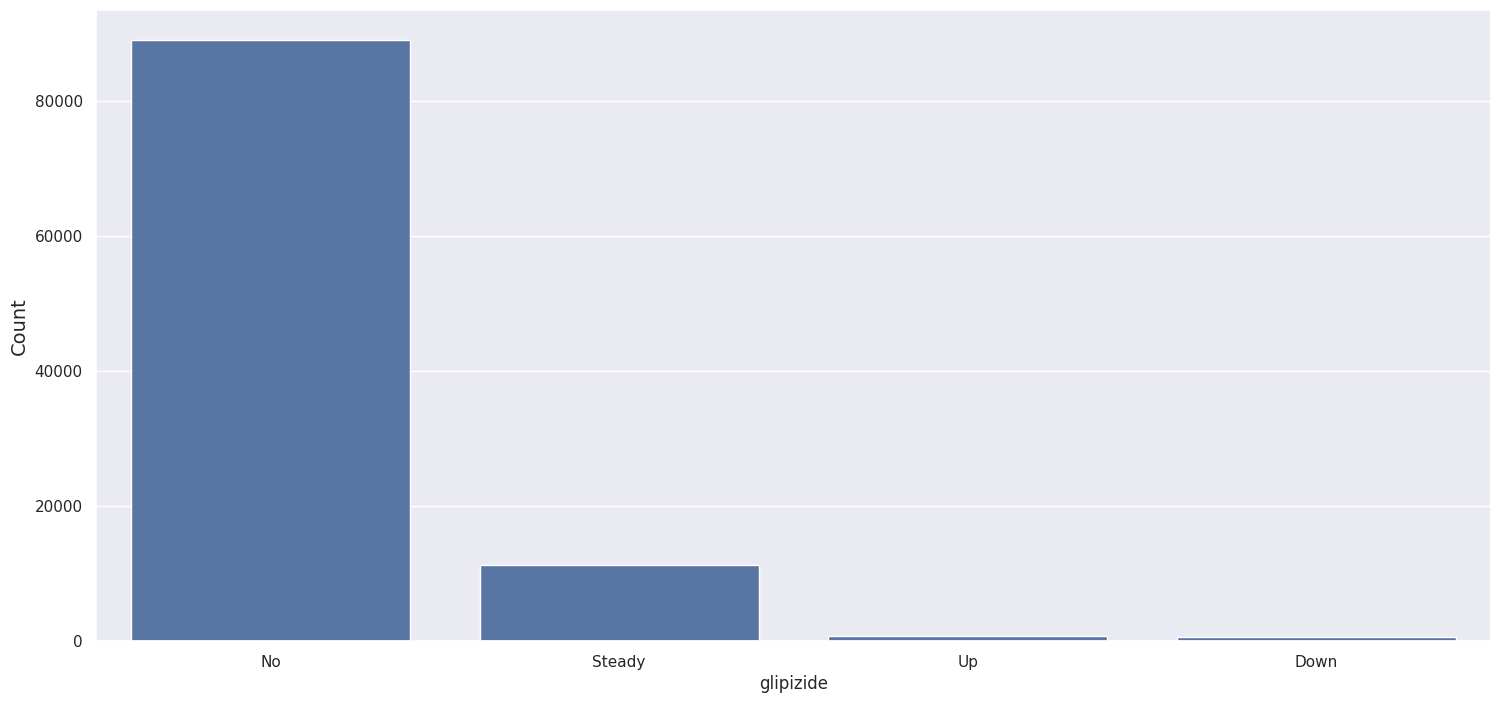

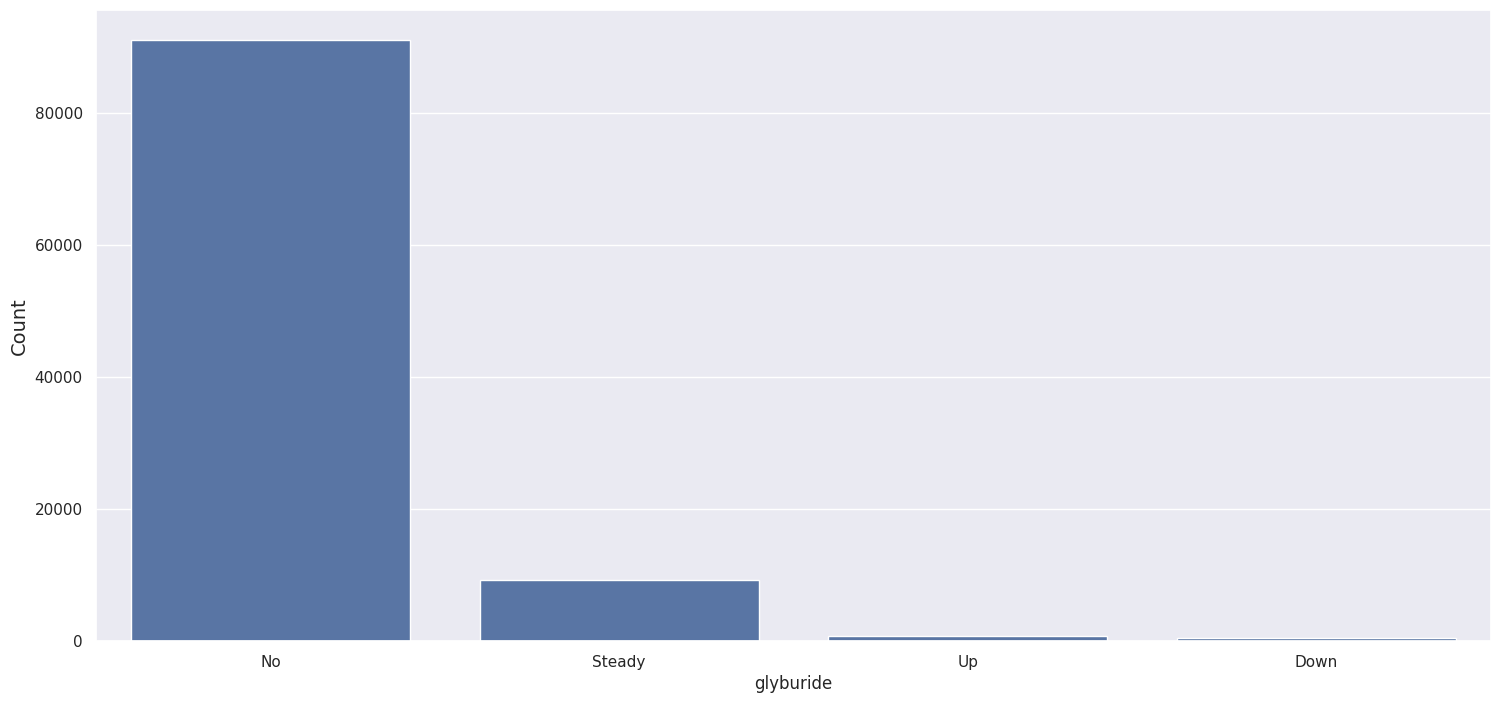

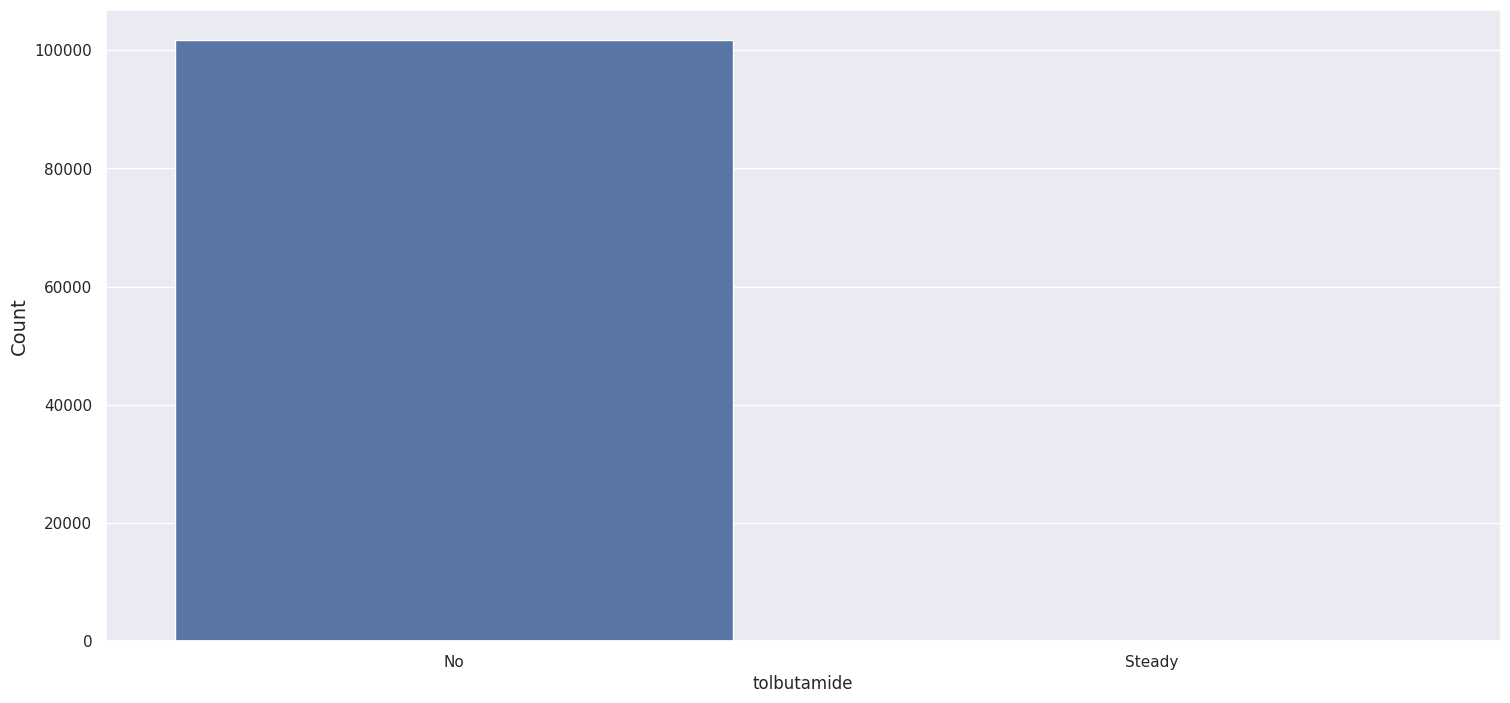

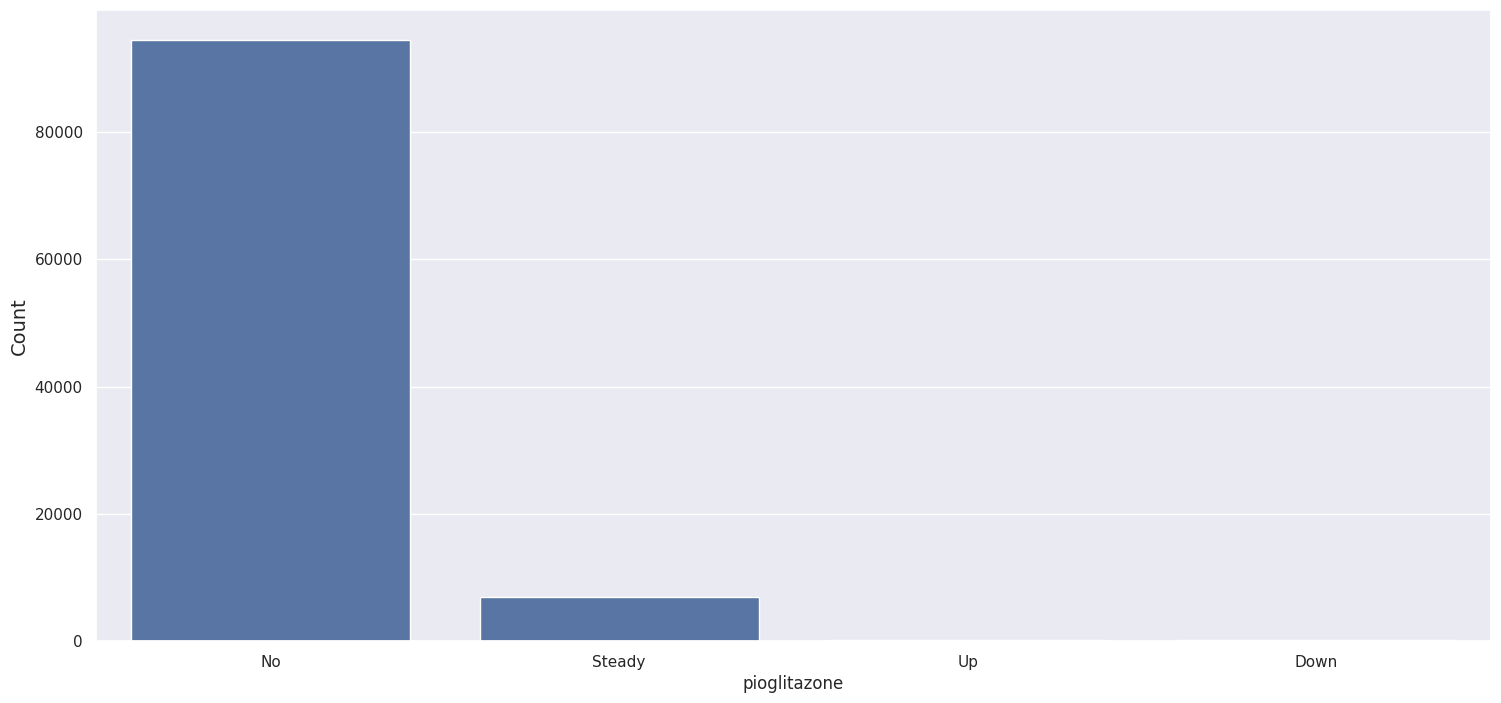

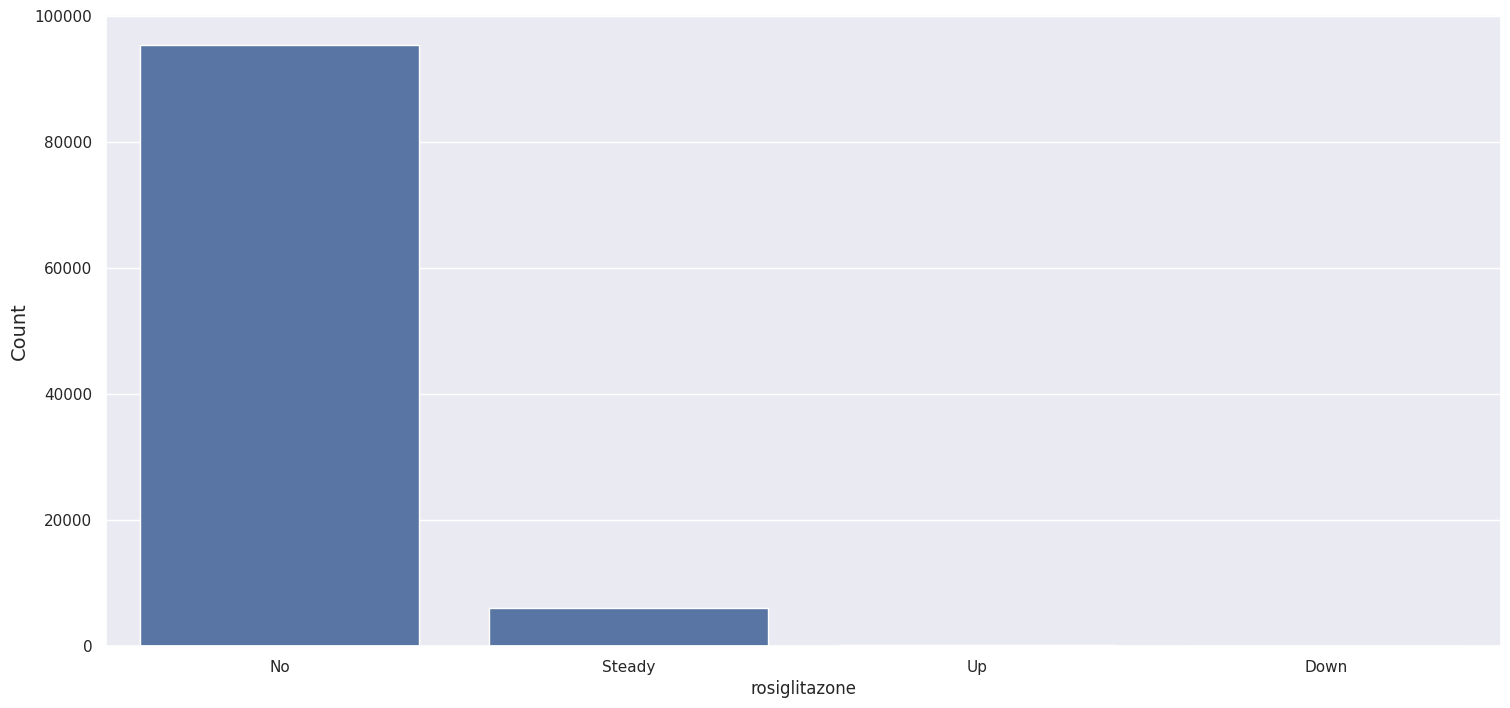

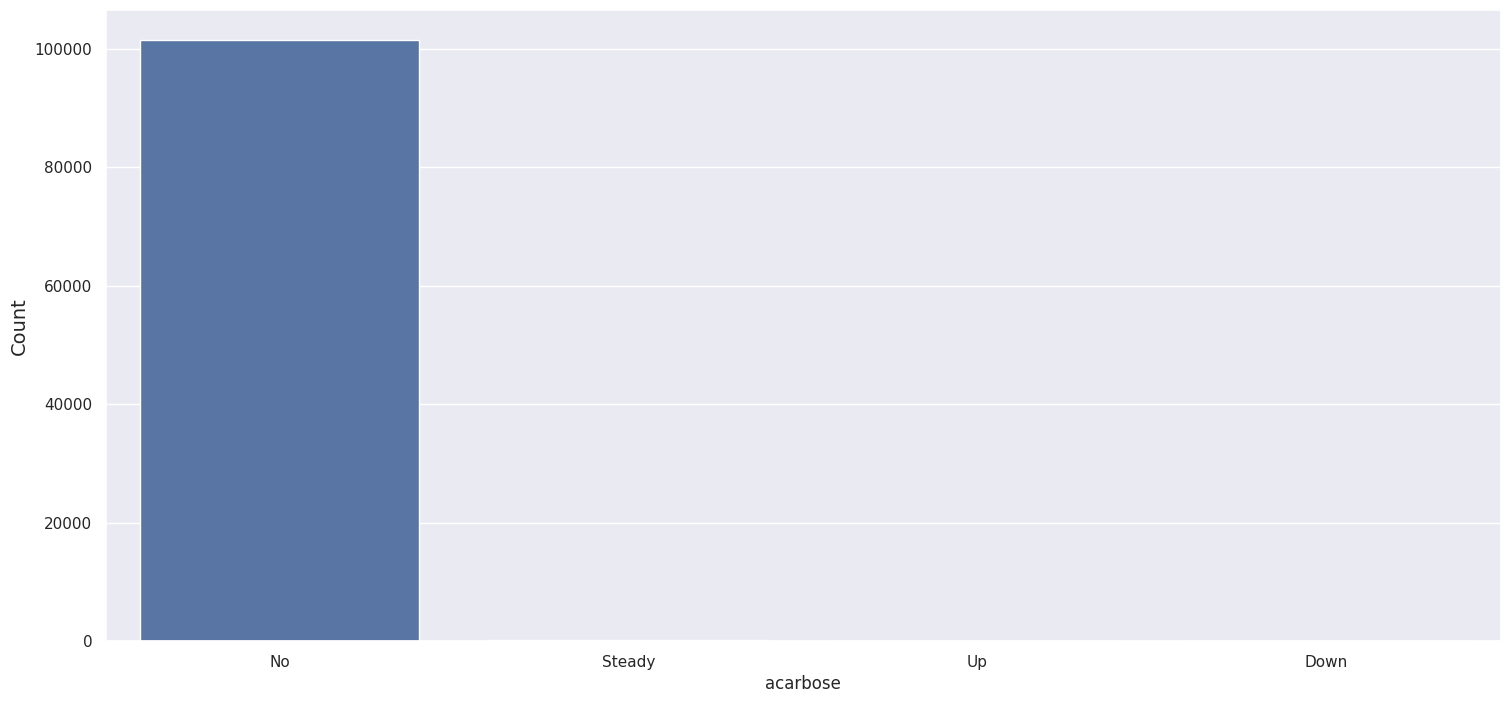

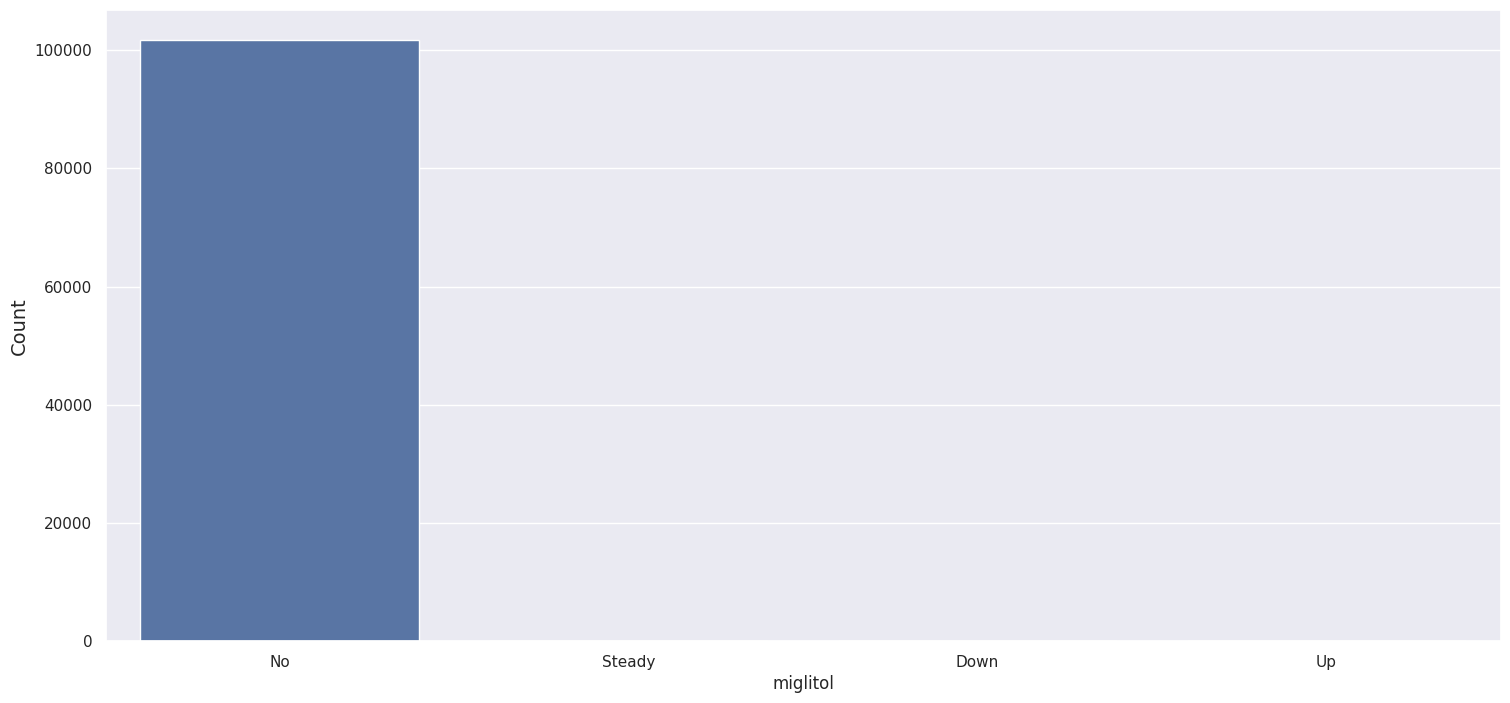

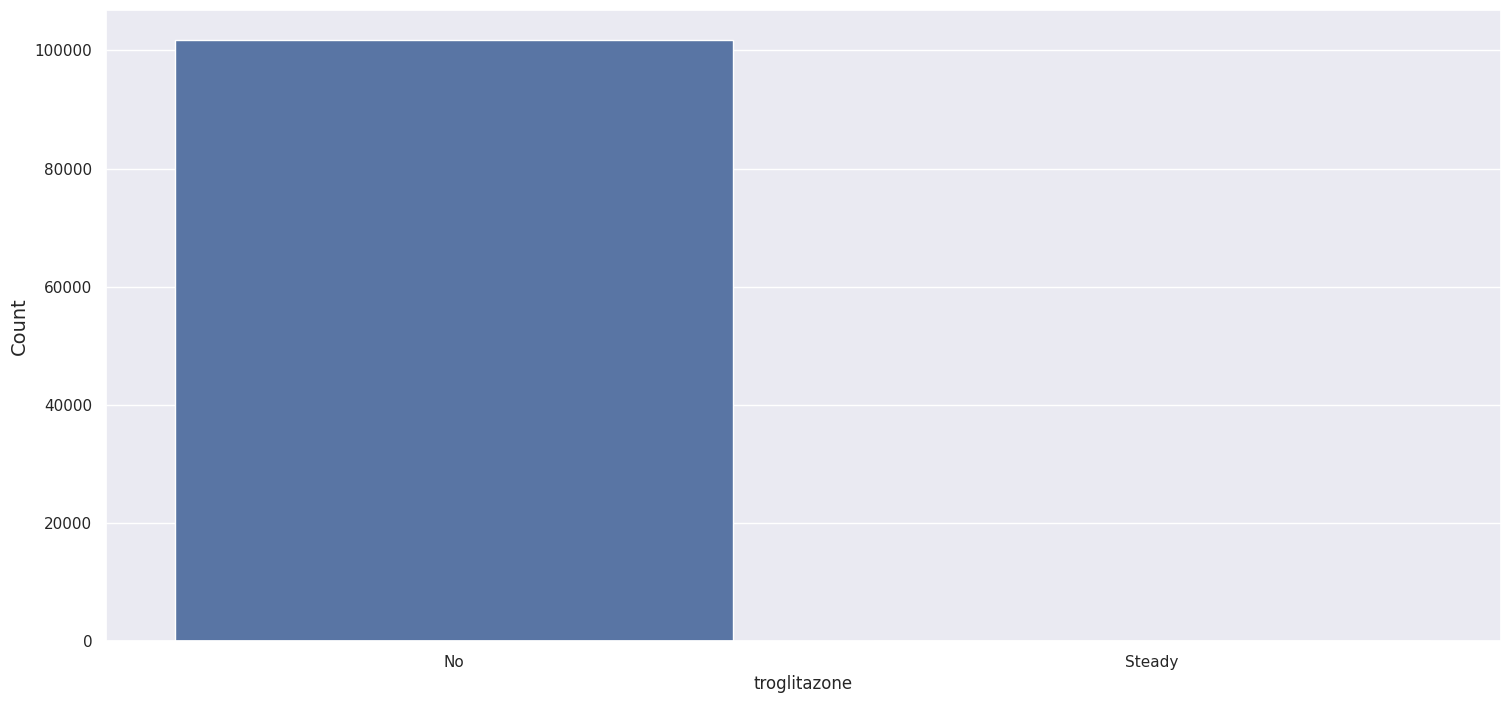

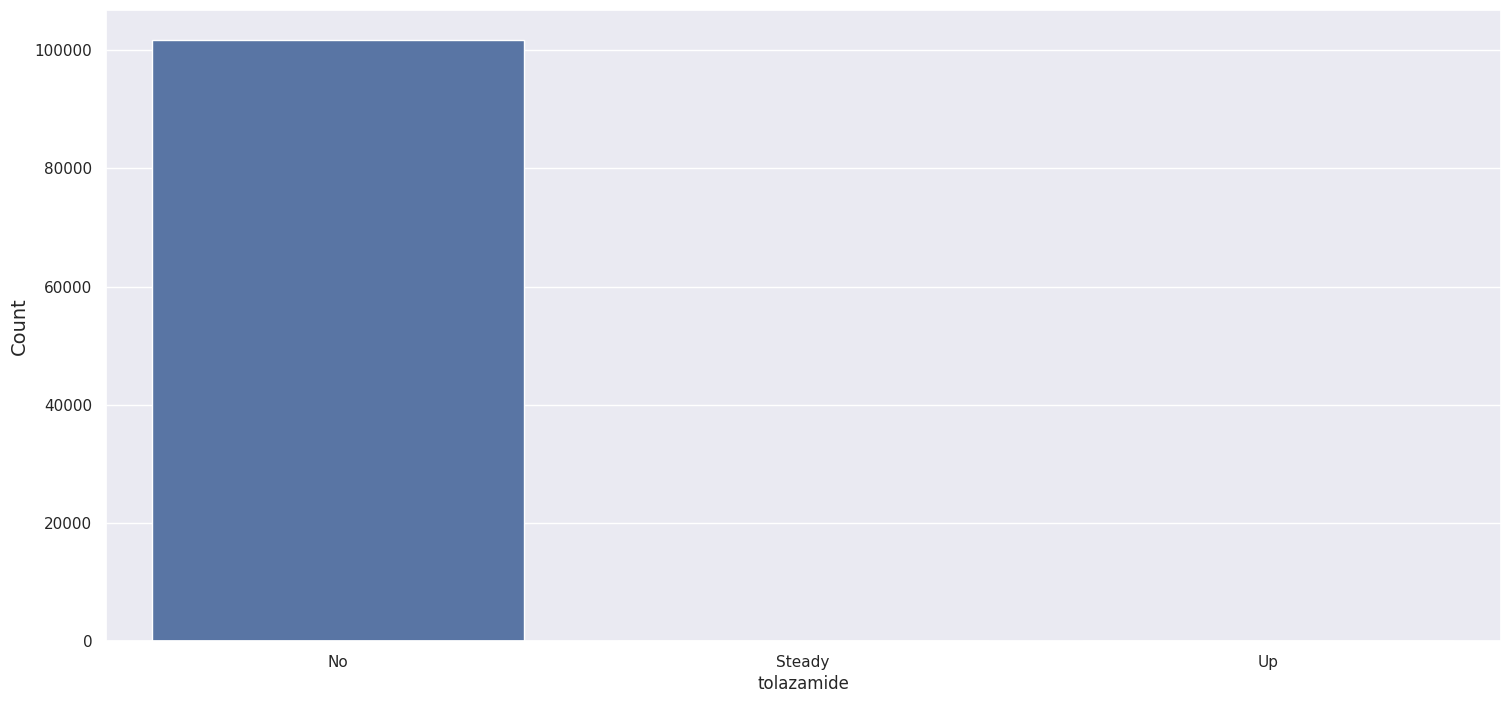

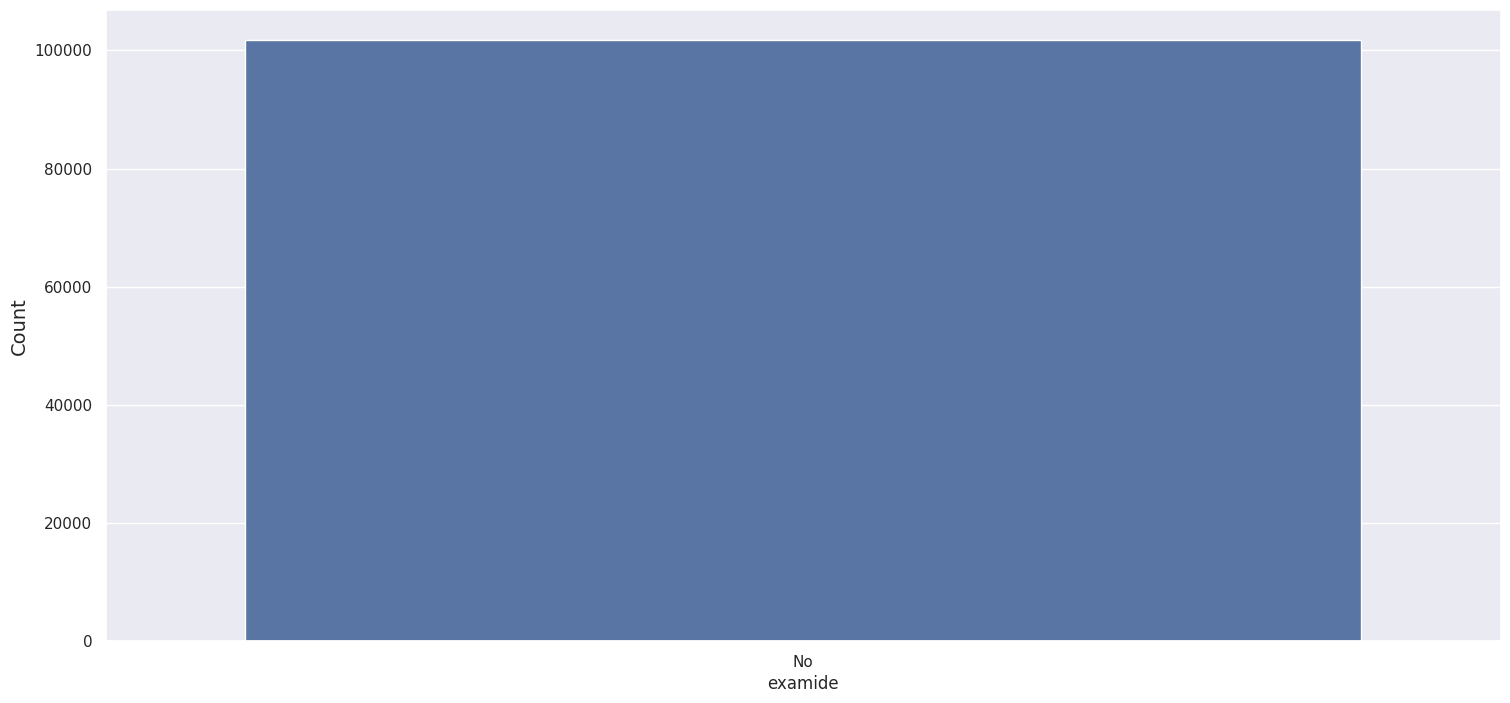

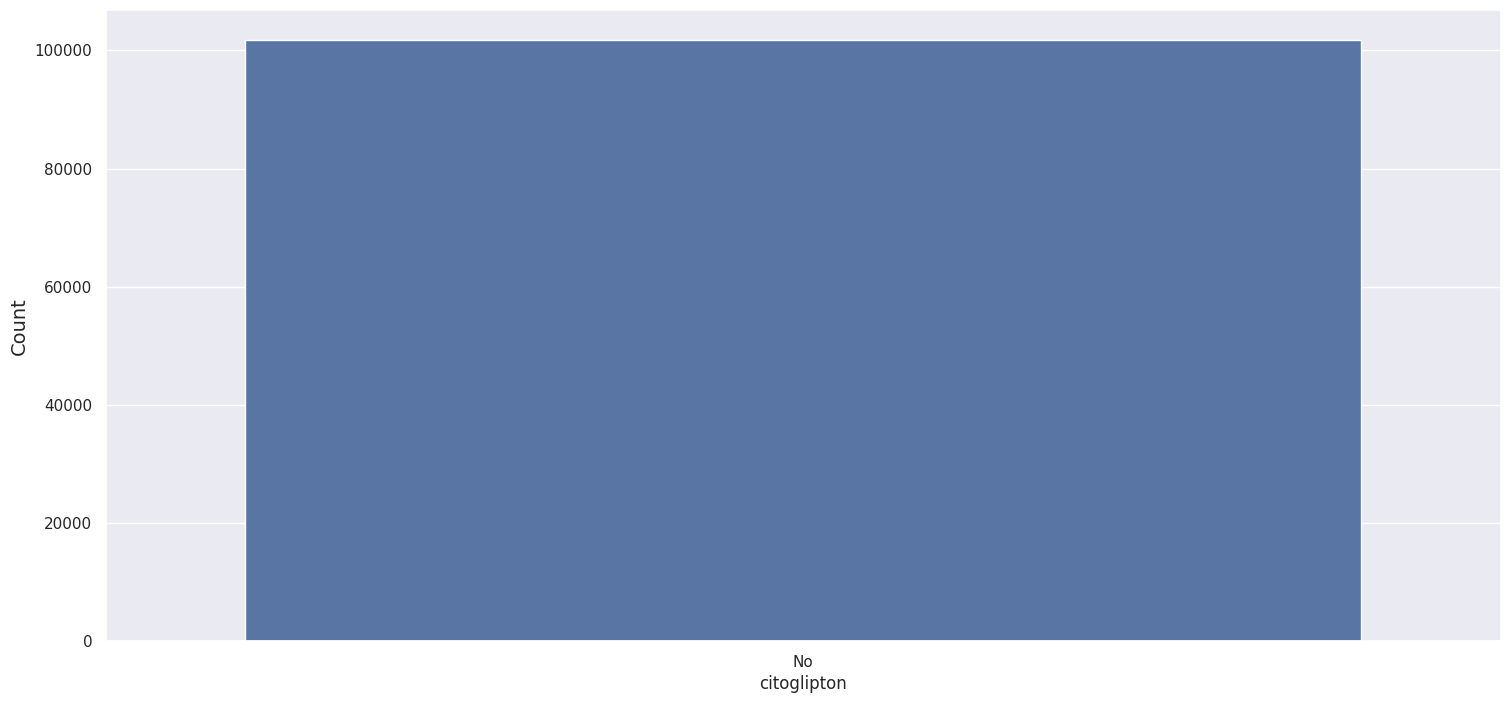

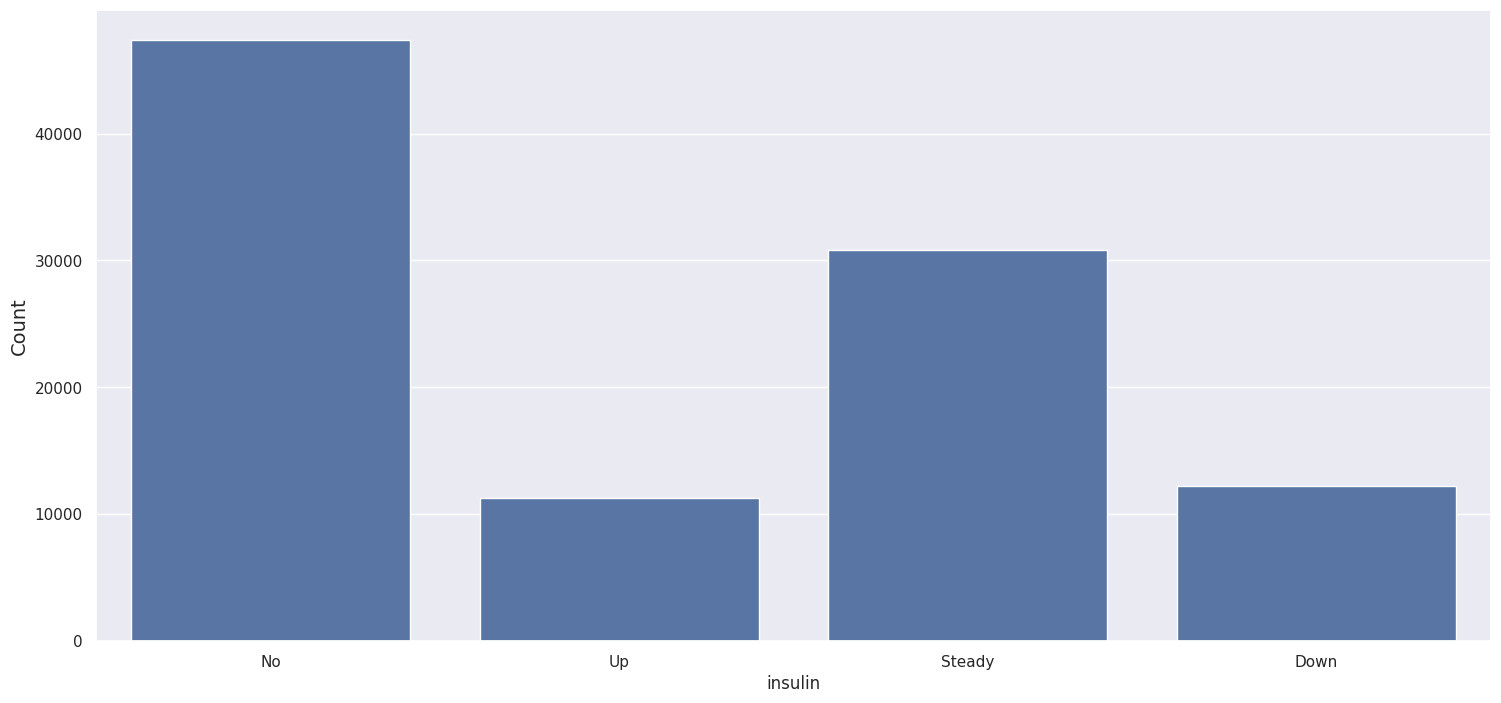

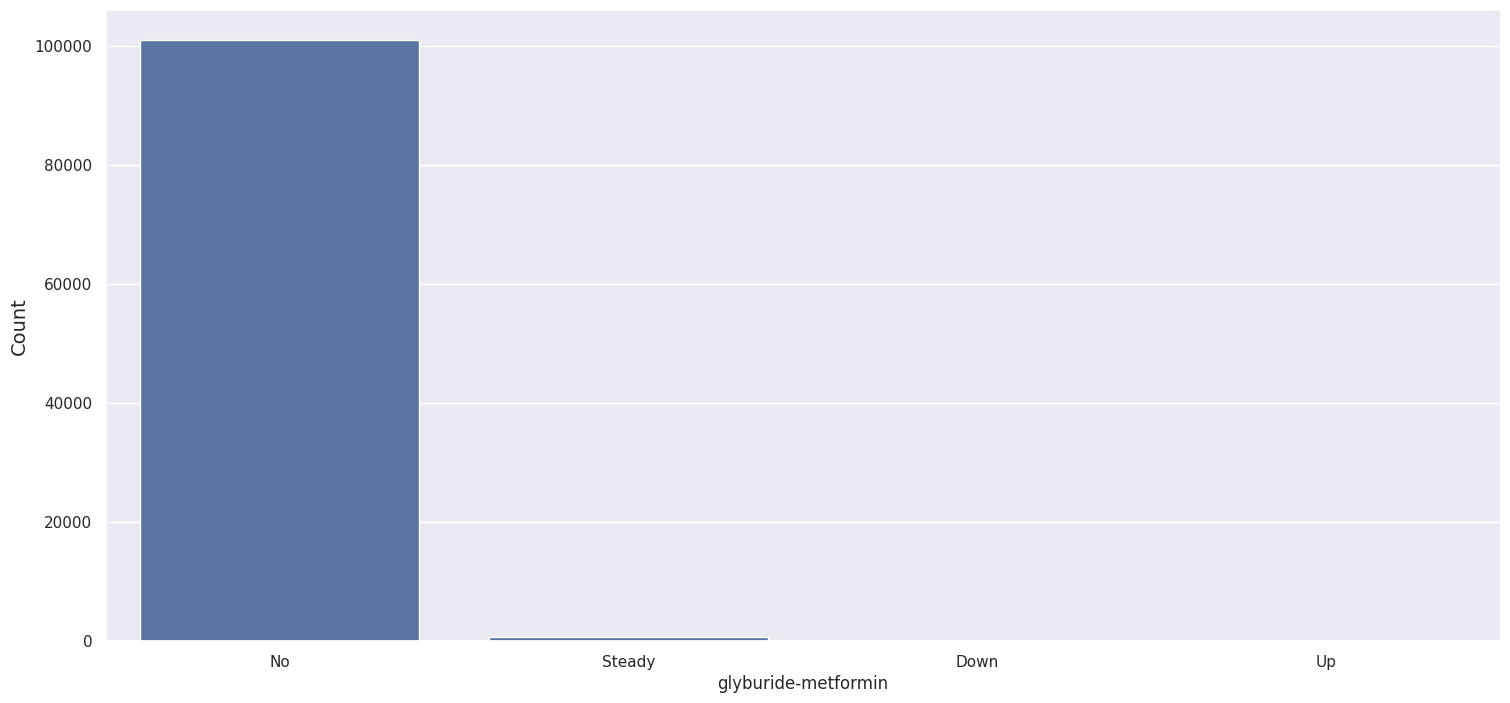

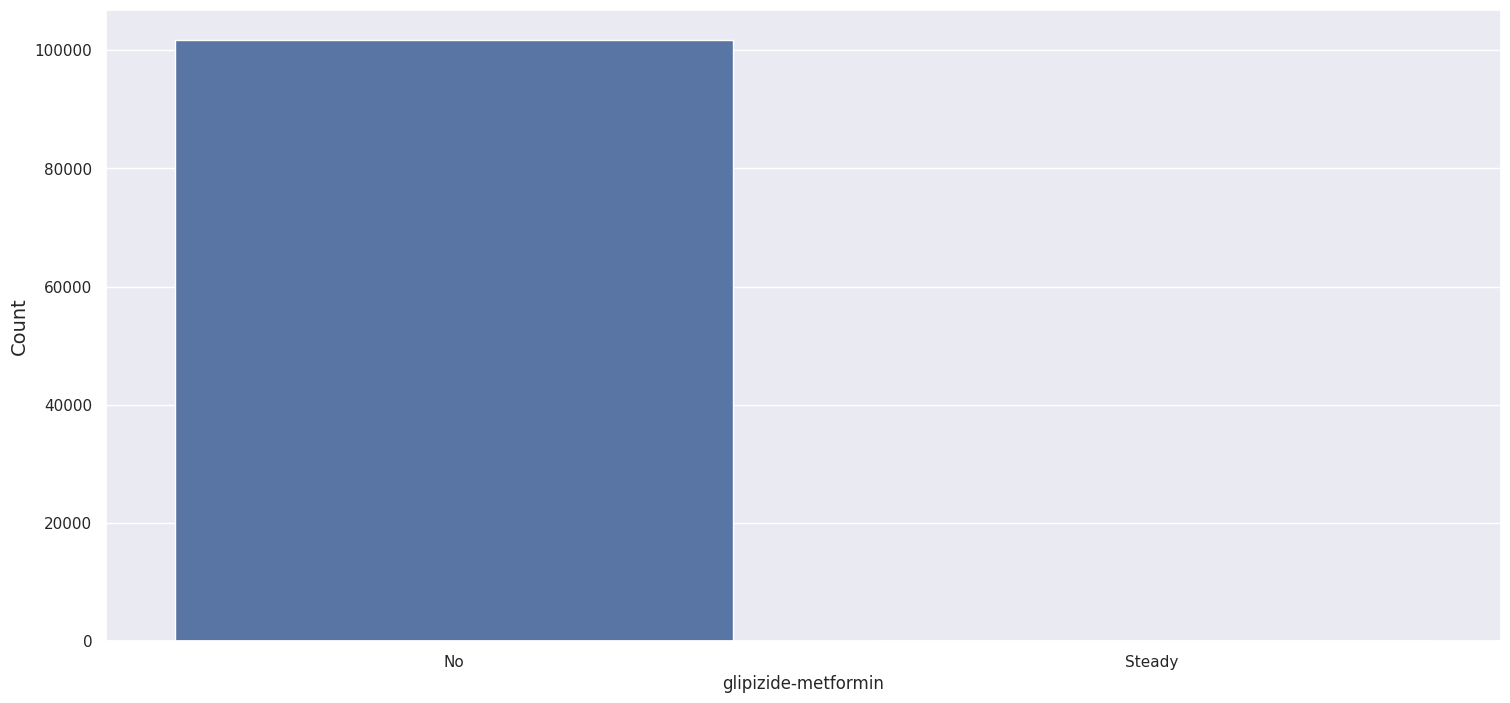

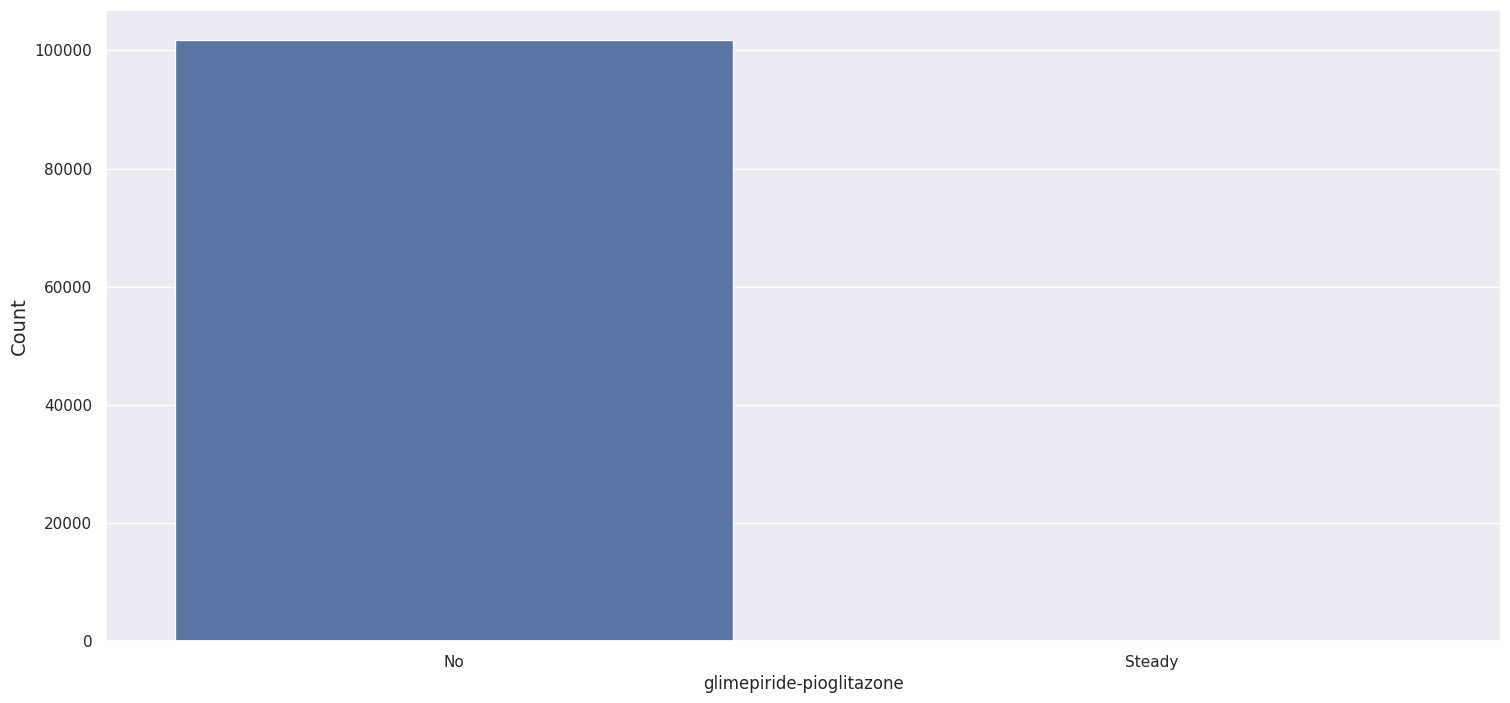

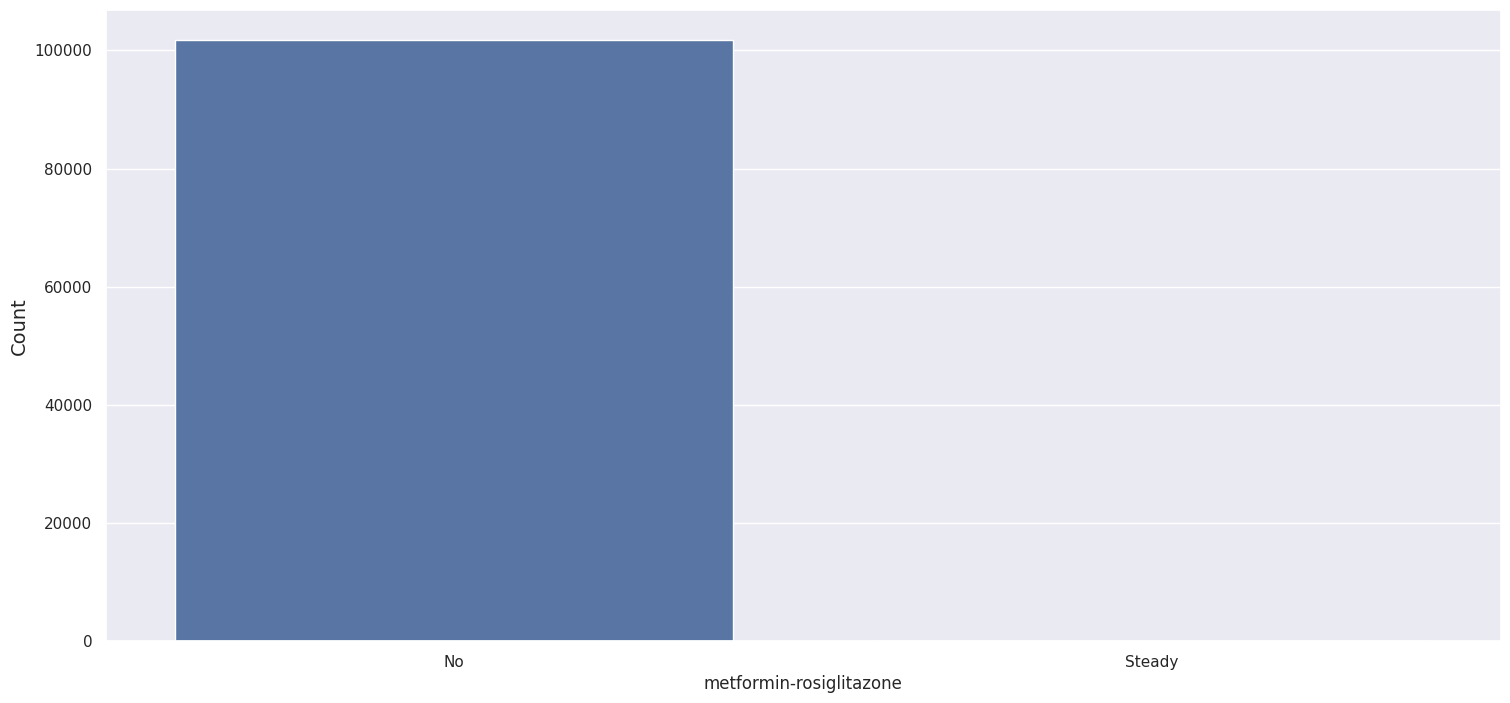

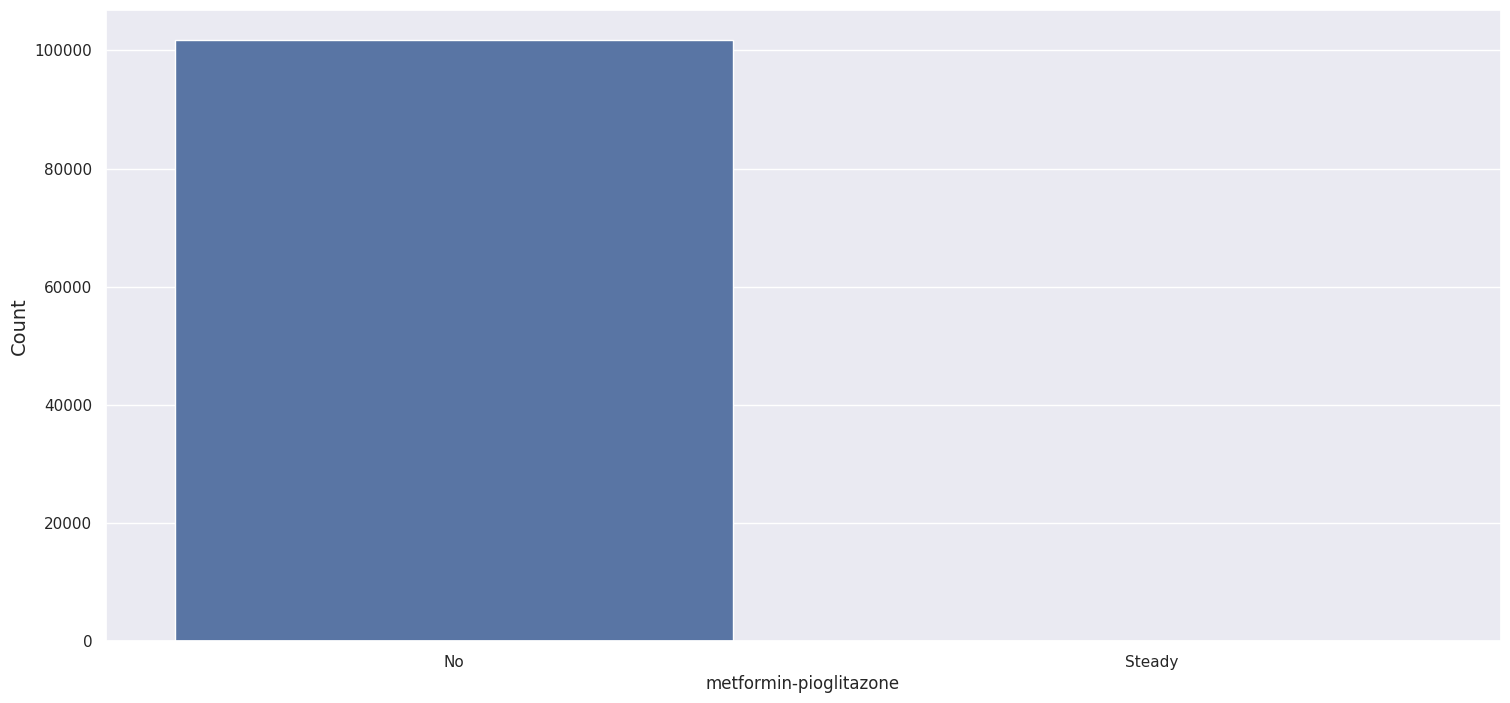

In [51]:
for i in df.iloc[:, 21:44].columns:

    ax = sns.countplot(x=i, data= df)
#     plt.xticks(rotation=90, size = 12)
    plt.ylabel('Count', size = 14)
    plt.show()

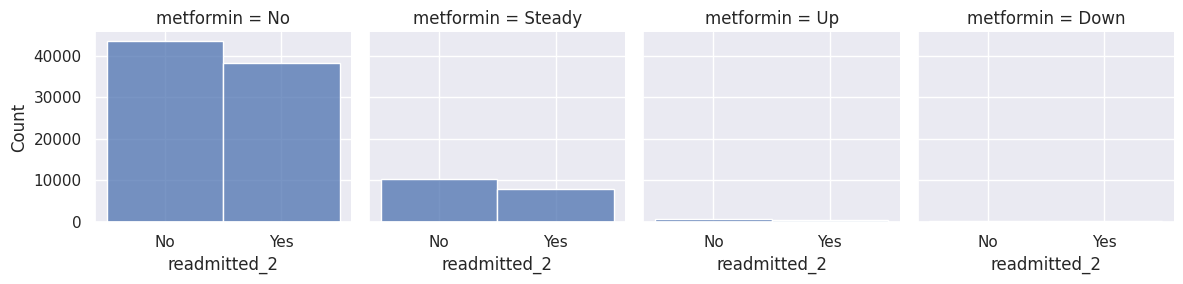

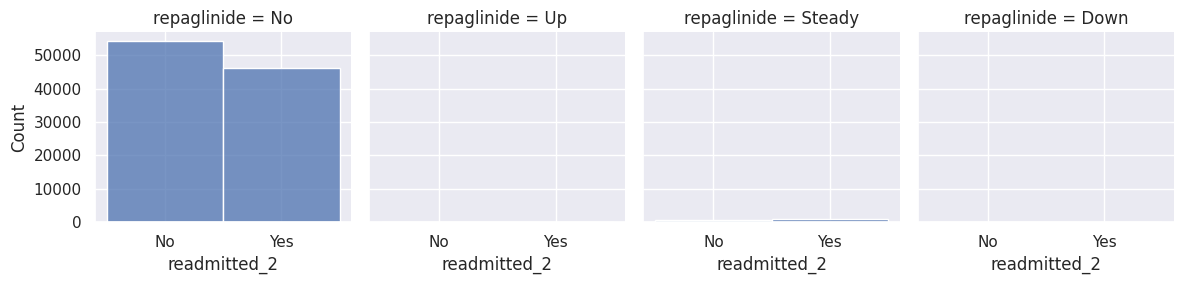

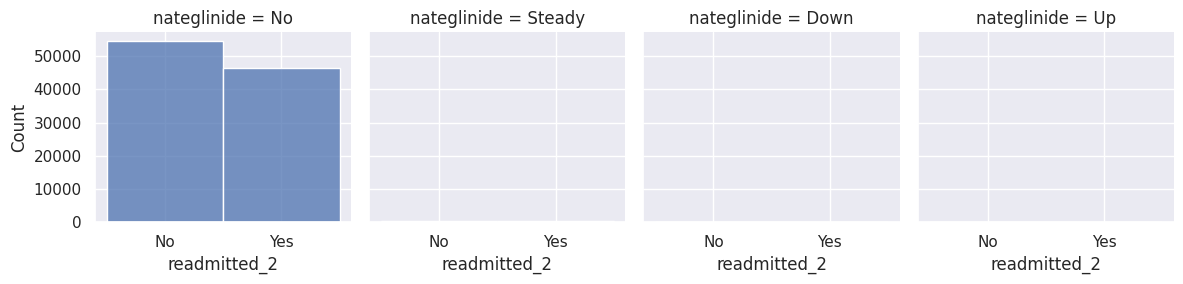

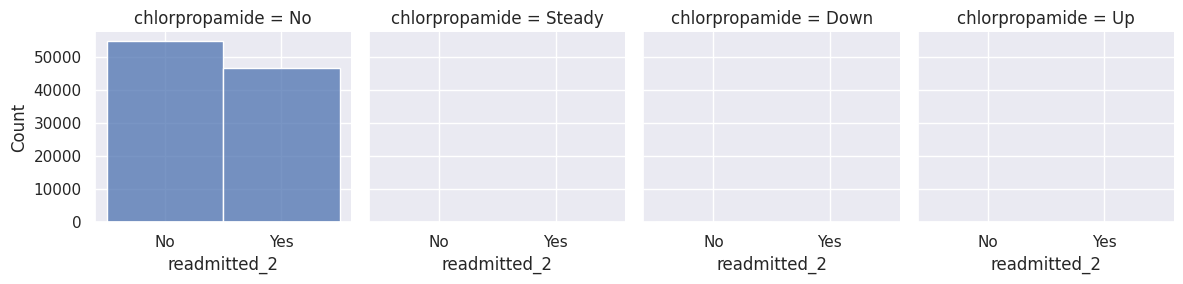

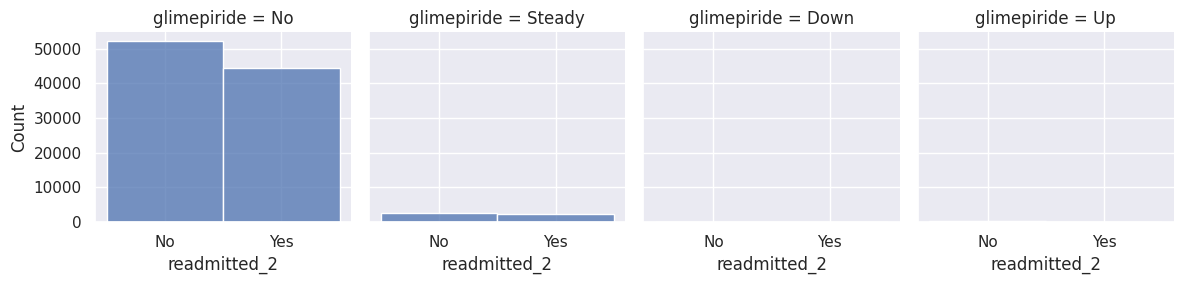

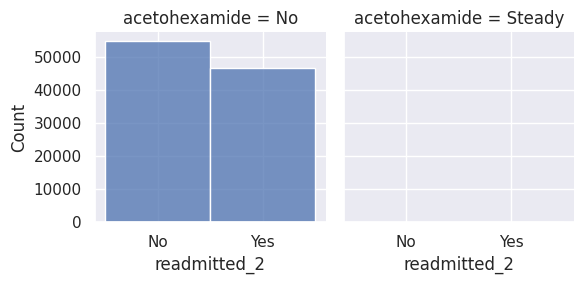

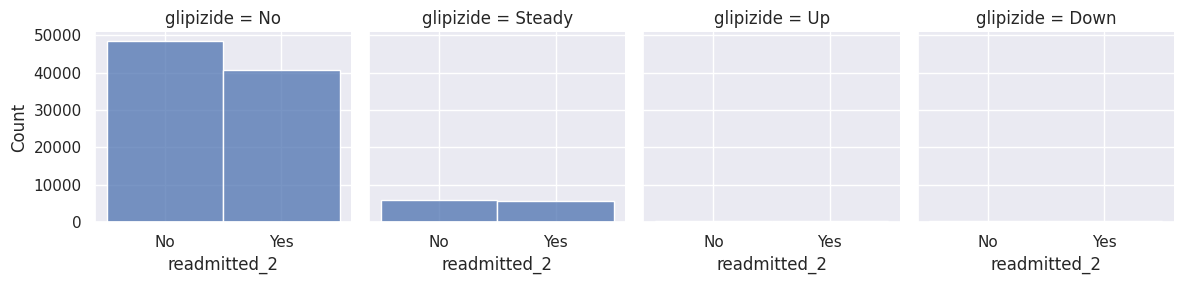

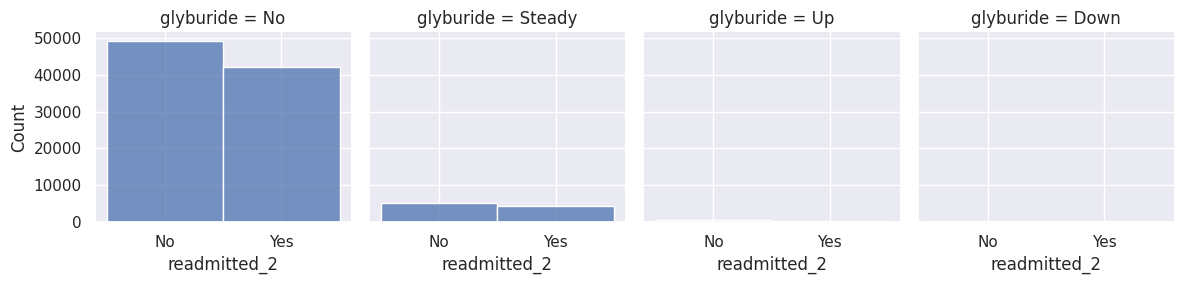

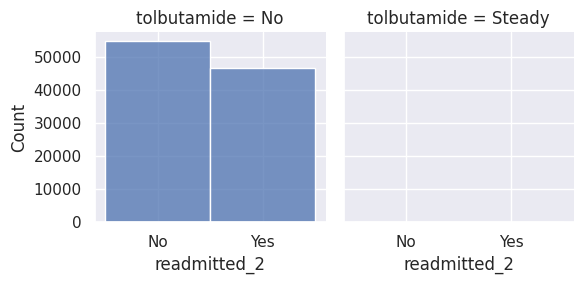

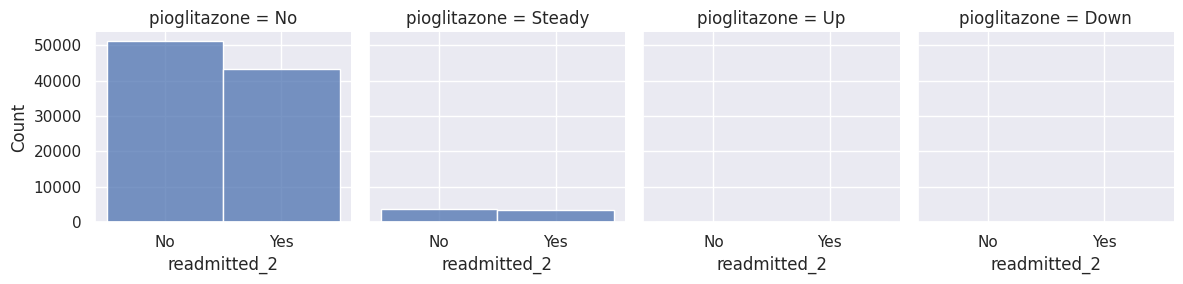

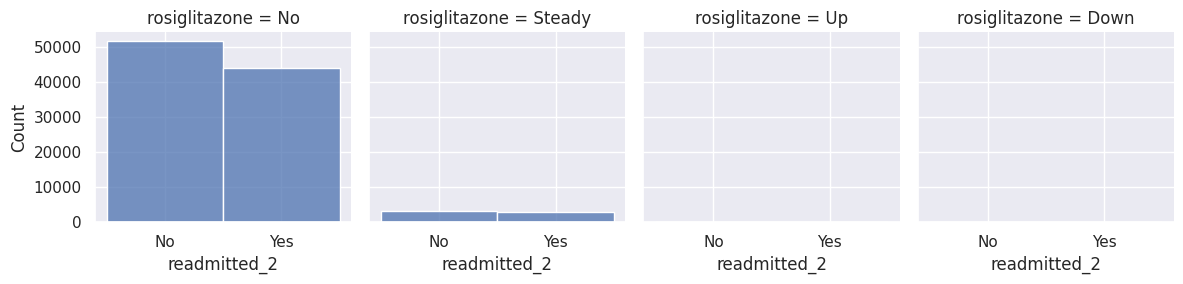

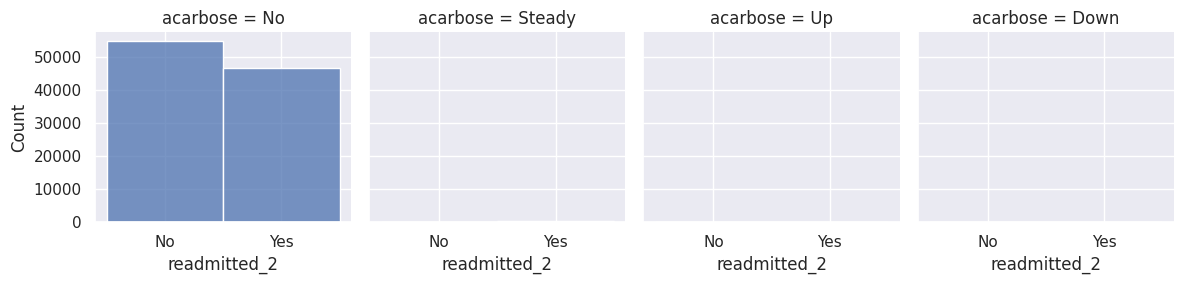

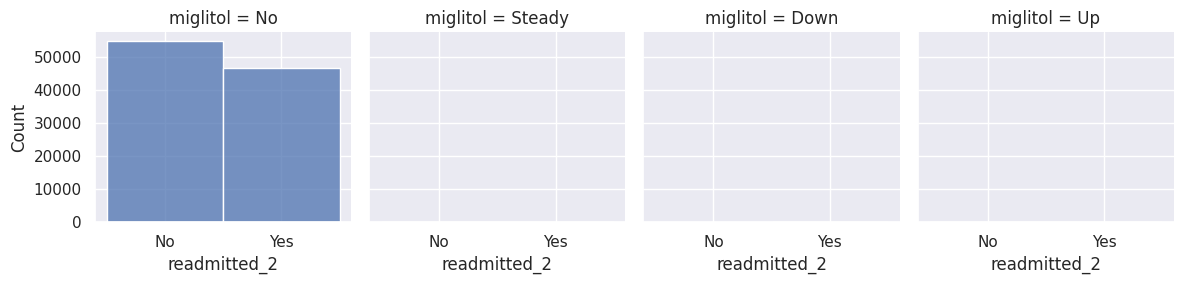

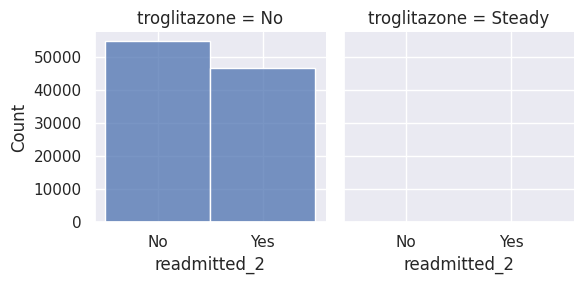

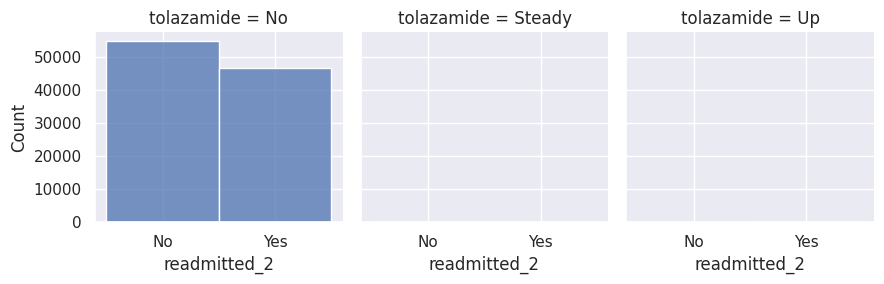

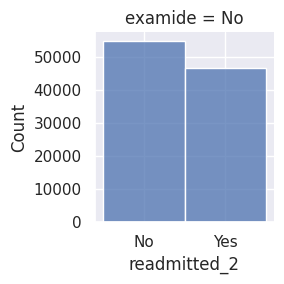

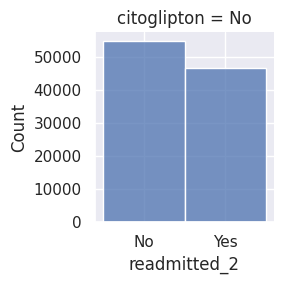

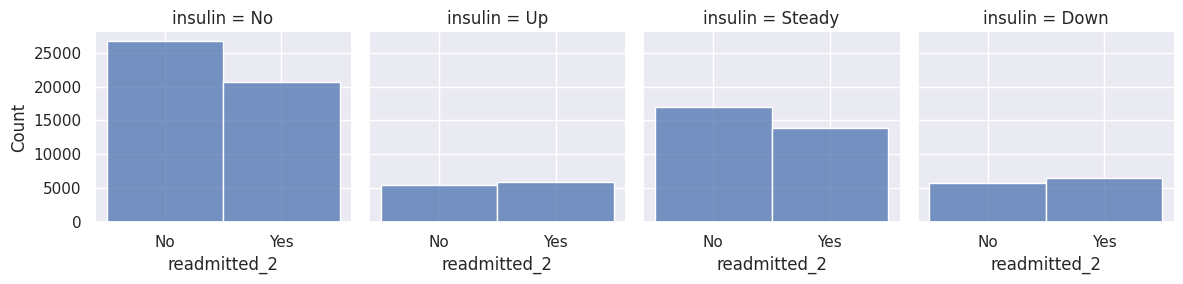

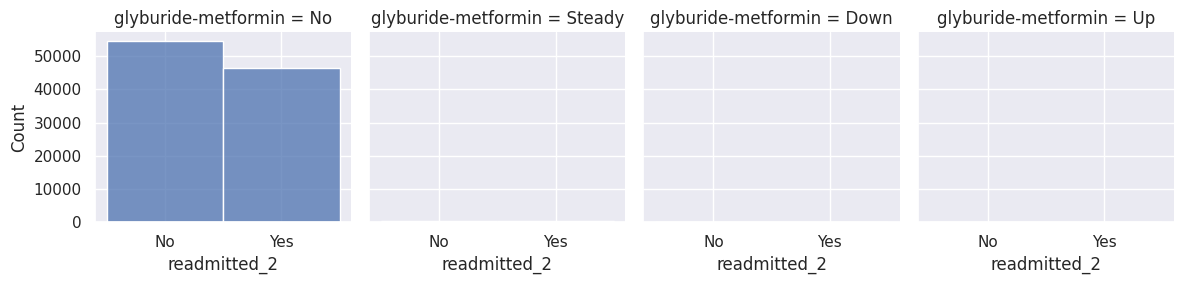

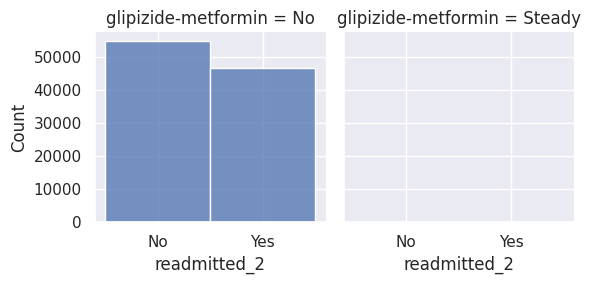

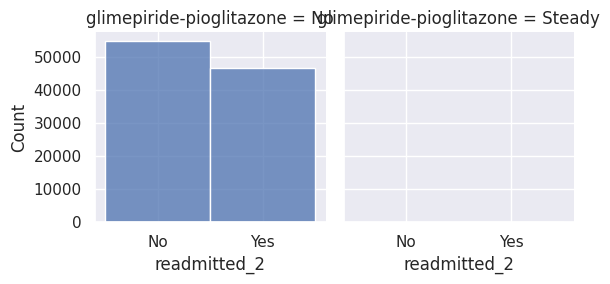

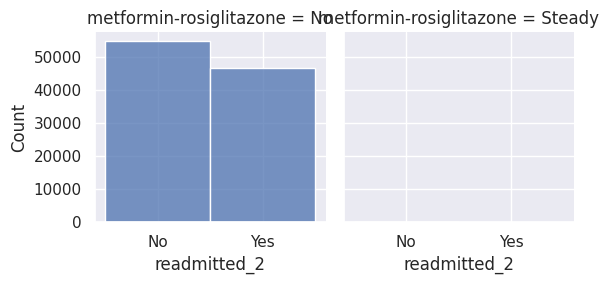

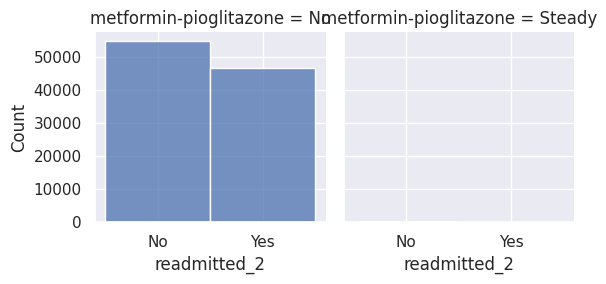

In [52]:
for columnName in df.iloc[:, 21:44].columns:
    g = sns.FacetGrid(df, col=columnName)
    g.map(sns.histplot, "readmitted_2")
#     plt.title(str(columnName) + 'vs Readmission', size = 13)
    plt.show()

In [53]:
df.drop(columns = ['acetohexamide', 'tolbutamide', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
                   'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone',
                   'metformin-pioglitazone'], inplace = True)

In [54]:
df.shape

(101763, 38)

In [55]:
# Make copy of data.
df_ = df.copy()

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

categorical_features =['race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin',
       'glyburide-metformin', 'change', 'diabetesMed']

for i in categorical_features:
    df_[i] = le.fit_transform(df_[i])

In [57]:
df_.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted,readmitted_2
0,2278392,8222157,2,0,0,5,23,0,1,41,...,1,1,1,1,1,1,1,0,NO,No
1,149190,55629189,2,0,1,0,0,6,3,59,...,1,1,1,1,3,1,0,1,>30,Yes
2,64410,86047875,0,0,2,0,0,6,2,11,...,1,1,1,1,1,1,1,1,NO,No
3,500364,82442376,2,1,3,0,0,6,2,44,...,1,1,1,1,3,1,0,1,NO,No
4,16680,42519267,2,1,4,0,0,6,1,51,...,1,1,1,1,2,1,0,1,NO,No


In [58]:
label = le.fit(df_['readmitted_2'])
df_['readmitted_2_encoded'] = label.transform(df_['readmitted_2'])

In [59]:
df_ = df_.drop(columns= ['encounter_id', 'patient_nbr', 'readmitted','readmitted_2'])
df_

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,insulin,glyburide-metformin,change,diabetesMed,readmitted_2_encoded
0,2,0,0,5,23,0,1,41,0,1,...,1,1,1,1,1,1,1,1,0,0
1,2,0,1,0,0,6,3,59,0,18,...,1,1,1,1,1,3,1,0,1,1
2,0,0,2,0,0,6,2,11,5,13,...,1,1,1,1,1,1,1,1,1,0
3,2,1,3,0,0,6,2,44,1,16,...,1,1,1,1,1,3,1,0,1,0
4,2,1,4,0,0,6,1,51,0,8,...,1,1,1,1,1,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,0,1,7,0,2,6,3,51,0,16,...,1,1,1,1,1,0,1,0,1,1
101759,0,0,8,0,3,4,5,33,3,18,...,1,1,1,1,1,2,1,1,1,0
101760,2,1,7,0,0,6,1,53,0,9,...,1,1,1,1,1,0,1,0,1,0
101761,2,0,8,1,2,6,10,45,2,21,...,1,2,1,1,1,3,1,0,1,0


In [60]:
df_[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
   'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']].corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.318429,0.191497,0.466137,-0.008919,-0.009683,0.073619,0.220153
num_lab_procedures,0.318429,1.000000,0.058105,0.268176,-0.007606,-0.002282,0.039225,0.152737
num_procedures,0.191497,0.058105,1.000000,0.385761,-0.024813,-0.038175,-0.066226,0.073769
num_medications,0.466137,0.268176,0.385761,1.000000,0.045198,0.013180,0.064196,0.261529
number_outpatient,-0.008919,-0.007606,-0.024813,0.045198,1.000000,0.091457,0.107334,0.094148
number_emergency,-0.009683,-0.002282,-0.038175,0.013180,0.091457,1.000000,0.266557,0.055536
number_inpatient,0.073619,0.039225,-0.066226,0.064196,0.107334,0.266557,1.000000,0.104703
number_diagnoses,0.220153,0.152737,0.073769,0.261529,0.094148,0.055536,0.104703,1.000000


In [61]:
X = df_.drop(columns= ['readmitted_2_encoded'])
Y = df_['readmitted_2_encoded']

from sklearn import preprocessing
scaled_X = preprocessing.StandardScaler().fit_transform(X)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((81410, 34), (20353, 34), (81410,), (20353,))

In [63]:
# Import required libraries and Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost


# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=450, max_depth=9, random_state=43),
    "XGBoost": xgboost.XGBClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,50), max_iter=500, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Make predictions

    # Print the classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, predictions, target_names=['Not Readmitted', 'Readmitted']))



Training Logistic Regression...

Logistic Regression Classification Report:
                precision    recall  f1-score   support

Not Readmitted       0.61      0.80      0.70     11016
    Readmitted       0.63      0.41      0.50      9337

      accuracy                           0.62     20353
     macro avg       0.62      0.60      0.60     20353
  weighted avg       0.62      0.62      0.60     20353


Training Random Forest...

Random Forest Classification Report:
                precision    recall  f1-score   support

Not Readmitted       0.64      0.78      0.70     11016
    Readmitted       0.65      0.48      0.55      9337

      accuracy                           0.64     20353
     macro avg       0.64      0.63      0.63     20353
  weighted avg       0.64      0.64      0.63     20353


Training XGBoost...

XGBoost Classification Report:
                precision    recall  f1-score   support

Not Readmitted       0.67      0.72      0.69     11016
    Readmitted

In [64]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

def categorize_readmission(value):
    if value == "<30":
        return 1
    elif value == ">30":
        return 2
    else:
        return 0

df_["readmitted_2_encoded"] = df_["readmitted_2_encoded"].apply(categorize_readmission)


label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_[col] = le.fit_transform(df_[col])
    label_encoders[col] = le

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                      'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
df_[numerical_features] = scaler.fit_transform(df_[numerical_features])

X = df_.drop(columns=['readmitted_2_encoded', 'readmitted_2_encoded'])  # Features
y = df_['readmitted_2_encoded']

X_reshaped = np.expand_dims(X.values, axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Not Readmitted, <30 days, >30 days
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

y_pred = np.argmax(model.predict(X_test), axis=1)

from sklearn.metrics import classification_report

# Ensure all labels (0, 1, 2) are represented in the report
print(classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=["Not Readmitted", "Readmitted <30 Days", "Readmitted >30 Days"]))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9868 - loss: 0.0429 - val_accuracy: 1.0000 - val_loss: 1.4270e-07
Epoch 2/20
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 1.0000 - loss: 4.1908e-07 - val_accuracy: 1.0000 - val_loss: 1.2768e-09
Epoch 3/20
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 1.0000 - loss: 9.8175e-08 - val_accuracy: 1.0000 - val_loss: 5.8571e-12
Epoch 4/20
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 1.0000 - loss: 2.6702e-08 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 1.0000 - loss: 4.4744e-09 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 1.0000 - loss: 1.3376e-09 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/20
2545/2545 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 1.0000 - loss: 4.2242e-10 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/20
2545/2545 ━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [65]:
from sklearn.metrics import classification_report

# Custom class names for better readability
print(classification_report(
    y_test,
    y_pred,
    labels=[0, 1, 2],
    target_names=[
        "Not_re_admitted",                # 0
        "Re_Admitted_within_one_month",   # 1
        "Re_Admitted_After_one_month"     # 2
    ]
))


                              precision    recall  f1-score   support

             Not_re_admitted       1.00      1.00      1.00     20353
Re_Admitted_within_one_month       0.00      0.00      0.00         0
 Re_Admitted_After_one_month       0.00      0.00      0.00         0

                    accuracy                           1.00     20353
                   macro avg       0.33      0.33      0.33     20353
                weighted avg       1.00      1.00      1.00     20353



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [66]:
import joblib # for saving scaler
# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

#Load scaler
scaler = joblib.load('scaler.pkl')

#Save model
model.save('trained_model.h5')

# Load model
from tensorflow import keras
model = keras.models.load_model('trained_model.h5')

In [67]:
import numpy as np
import pandas as pd

def predict_readmission(input_data, model, scaler):
    """
    Predicts patient readmission based on input data.

    Args:
        input_data (dict): A dictionary containing patient features.
        model: The trained Keras model.
        scaler: The scaler used for data preprocessing.

    Returns:
        str: The predicted readmission outcome.
    """

    # Convert input dictionary to a DataFrame
    input_df = pd.DataFrame([input_data])

    # Preprocessing (same as training data)
    # Select the numerical columns that you scaled during training.
    numerical_cols = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                      'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
    input_scaled = scaler.transform(input_df[numerical_cols])

    # Convert the scaled data back into a dataframe.
    input_df[numerical_cols] = input_scaled

    # Reshape for LSTM input (if applicable)
    input_array = input_df.values.reshape(1, 1, input_df.shape[1]).astype('float32') #modify the shape if needed

    # Make prediction
    prediction = model.predict(input_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map prediction to human-readable output
    if predicted_class == 0:
        return "Not Re-admitted"
    elif predicted_class == 1:
        return "Re-Admitted within one month"
    elif predicted_class == 2:
        return "Re-Admitted after one month"
    else:
        return "Unknown"

In [70]:
sample_input = {
    'encounter_id': 12345,
    'patient_nbr': 67890,
    'race': 2,
    'gender': 1,
    'age': 7,
    'admission_type_id': 1,
    'discharge_disposition_id': 1,
    'admission_source_id': 7,
    'time_in_hospital': 3,
    'num_lab_procedures': 50,
    'pioglitazone': 1,
    'rosiglitazone': 1,
    'acarbose': 1,
    'miglitol': 1,
    'insulin': 1,
    'glyburide-metformin': 1,
    'change': 1,
    'diabetesMed': 1,
    'num_procedures': 10,
    'num_medications': 5,
    'number_outpatient': 2,
    'number_emergency': 1,
    'number_inpatient': 1,
    'number_diagnoses':2
}

result = predict_readmission(sample_input, model, scaler)
print(f"Predicted Readmission: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Predicted Readmission: Not Re-admitted
